In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/psychological-state-identification-dataset/psychological_state_dataset.csv


In [2]:
import pandas as pd

# Διαβάζουμε το CSV αρχείο
df = pd.read_csv('/kaggle/input/psychological-state-identification-dataset/psychological_state_dataset.csv')

# Εμφανίζουμε τις πρώτες γραμμές
df.head()


ID                 Time   HRV (ms)  GSR (μS)  \
0   1  2024-01-01 00:00:00  33.039739  1.031806   
1   2  2024-01-01 00:00:01  49.914651  1.340983   
2   3  2024-01-01 00:00:02  67.894401  1.006014   
3   4  2024-01-01 00:00:03  34.705373  0.849270   
4   5  2024-01-01 00:00:04  52.896549  0.879084   

                                     EEG Power Bands Blood Pressure (mmHg)  \
0  [0.7583653347946298, 1.423247998317594, 0.6157...                114/79   
1  [0.5520419333516282, 1.858065835142619, 0.3766...                113/86   
2  [1.0261365005886114, 1.3504934190994182, 2.308...                124/74   
3  [1.6075723109471591, 1.6619672129812242, 0.344...                120/73   
4  [1.055003922514022, 0.7643319894343756, 1.0745...                111/80   

   Oxygen Saturation (%)  Heart Rate (BPM)  Ambient Noise (dB) Cognitive Load  \
0              98.433312                98           56.863054            Low   
1              98.944505                70           45.343430            Low   
2              95.990753                91           50.029264           High   
3              98.173643                95           60.802104            Low   
4              96.225051                65           40.696384           High   

  Mood State Psychological State  Respiration Rate (BPM)  Skin Temp (°C)  \
0    Anxious            Stressed                      21       34.566484   
1    Neutral            Stressed                      21       35.358593   
2        Sad             Relaxed                      17       34.359495   
3    Neutral             Anxious                      12       34.802638   
4    Anxious            Stressed                      14       35.869862   

   Focus Duration (s)         Task Type  Age  Gender Educational Level  \
0                  27              Exam   22  Female      Postgraduate   
1                 282        Assignment   23    Male     Undergraduate   
2                  50  Group Discussion   18  Female      Postgraduate   
3                 223              Exam   28  Female       High School   
4                 201  Group Discussion   24  Female       High School   

   Study Major  
0  Engineering  
1         Arts  
2         Arts  
3  Engineering  
4  Engineering

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      1000 non-null   int64  
 1   Time                    1000 non-null   object 
 2   HRV (ms)                1000 non-null   float64
 3   GSR (μS)                1000 non-null   float64
 4   EEG Power Bands         1000 non-null   object 
 5   Blood Pressure (mmHg)   1000 non-null   object 
 6   Oxygen Saturation (%)   1000 non-null   float64
 7   Heart Rate (BPM)        1000 non-null   int64  
 8   Ambient Noise (dB)      1000 non-null   float64
 9   Cognitive Load          1000 non-null   object 
 10  Mood State              1000 non-null   object 
 11  Psychological State     1000 non-null   object 
 12  Respiration Rate (BPM)  1000 non-null   int64  
 13  Skin Temp (°C)          1000 non-null   float64
 14  Focus Duration (s)      1000 non-null   i

In [4]:
df.head(5)

ID                 Time   HRV (ms)  GSR (μS)  \
0   1  2024-01-01 00:00:00  33.039739  1.031806   
1   2  2024-01-01 00:00:01  49.914651  1.340983   
2   3  2024-01-01 00:00:02  67.894401  1.006014   
3   4  2024-01-01 00:00:03  34.705373  0.849270   
4   5  2024-01-01 00:00:04  52.896549  0.879084   

                                     EEG Power Bands Blood Pressure (mmHg)  \
0  [0.7583653347946298, 1.423247998317594, 0.6157...                114/79   
1  [0.5520419333516282, 1.858065835142619, 0.3766...                113/86   
2  [1.0261365005886114, 1.3504934190994182, 2.308...                124/74   
3  [1.6075723109471591, 1.6619672129812242, 0.344...                120/73   
4  [1.055003922514022, 0.7643319894343756, 1.0745...                111/80   

   Oxygen Saturation (%)  Heart Rate (BPM)  Ambient Noise (dB) Cognitive Load  \
0              98.433312                98           56.863054            Low   
1              98.944505                70           45.343430            Low   
2              95.990753                91           50.029264           High   
3              98.173643                95           60.802104            Low   
4              96.225051                65           40.696384           High   

  Mood State Psychological State  Respiration Rate (BPM)  Skin Temp (°C)  \
0    Anxious            Stressed                      21       34.566484   
1    Neutral            Stressed                      21       35.358593   
2        Sad             Relaxed                      17       34.359495   
3    Neutral             Anxious                      12       34.802638   
4    Anxious            Stressed                      14       35.869862   

   Focus Duration (s)         Task Type  Age  Gender Educational Level  \
0                  27              Exam   22  Female      Postgraduate   
1                 282        Assignment   23    Male     Undergraduate   
2                  50  Group Discussion   18  Female      Postgraduate   
3                 223              Exam   28  Female       High School   
4                 201  Group Discussion   24  Female       High School   

   Study Major  
0  Engineering  
1         Arts  
2         Arts  
3  Engineering  
4  Engineering

In [5]:
df.tail()

ID                 Time   HRV (ms)  GSR (μS)  \
995   996  2024-01-01 00:16:35  73.056208  0.961572   
996   997  2024-01-01 00:16:36  60.489220  1.167583   
997   998  2024-01-01 00:16:37  60.795800  0.996753   
998   999  2024-01-01 00:16:38  42.321587  0.681139   
999  1000  2024-01-01 00:16:39  49.005242  1.384472   

                                       EEG Power Bands Blood Pressure (mmHg)  \
995  [1.41709835038492, 0.5581367225529581, 2.05776...                120/72   
996  [0.4366569966688739, 0.6024761956899303, 1.601...                110/86   
997  [2.4466973658165383, 0.4037428407944566, 0.437...                127/83   
998  [2.232452864846464, 0.6589898799306273, 1.0954...                126/73   
999  [0.6375019674072194, 0.942131949788696, 2.4602...                129/79   

     Oxygen Saturation (%)  Heart Rate (BPM)  Ambient Noise (dB)  \
995              96.380705                66           39.395938   
996              99.885334                75           31.074585   
997              99.851796                82           53.373199   
998              96.829325                84           32.758992   
999              95.094748                96           31.456953   

    Cognitive Load Mood State Psychological State  Respiration Rate (BPM)  \
995           High    Neutral            Stressed                      22   
996       Moderate      Happy             Focused                      12   
997       Moderate      Happy             Relaxed                      23   
998       Moderate      Happy            Stressed                      19   
999            Low    Anxious             Relaxed                      17   

     Skin Temp (°C)  Focus Duration (s)   Task Type  Age Gender  \
995       34.710484                  99  Assignment   24   Male   
996       34.636933                 191        Exam   19   Male   
997       35.572915                 103     Lecture   28   Male   
998       35.295968                 241  Assignment   26   Male   
999       34.357262                  94        Exam   23   Male   

    Educational Level  Study Major  
995      Postgraduate      Science  
996     Undergraduate      Science  
997      Postgraduate      Science  
998      Postgraduate  Engineering  
999     Undergraduate         Arts

In [7]:
print(df.columns)


Index(['ID', 'Time', 'HRV (ms)', 'GSR (μS)', 'EEG Power Bands',
       'Blood Pressure (mmHg)', 'Oxygen Saturation (%)', 'Heart Rate (BPM)',
       'Ambient Noise (dB)', 'Cognitive Load', 'Mood State',
       'Psychological State', 'Respiration Rate (BPM)', 'Skin Temp (°C)',
       'Focus Duration (s)', 'Task Type', 'Age', 'Gender', 'Educational Level',
       'Study Major'],
      dtype='object')


Αισθητήρια & Βιομετρικά Δεδομένα
HRV (ms): Heart Rate Variability — δείκτης στρες.

GSR (μS): Galvanic Skin Response — σχετίζεται με συναισθηματική διέγερση.

EEG Power Bands: Εγκεφαλικές συχνότητες, δείκτης εγκεφαλικής δραστηριότητας.

Blood Pressure (mmHg): Αρτηριακή πίεση.

Oxygen Saturation (%): Επίπεδα οξυγόνου στο αίμα.

Heart Rate (BPM): Καρδιακοί παλμοί.

Ambient Noise (dB): Περιβαλλοντικός θόρυβος.

Respiration Rate (BPM): Ρυθμός αναπνοής.

Skin Temp (°C): Θερμοκρασία δέρματος.

🧠 Ψυχολογικά / Συμπεριφορικά
Cognitive Load: Πνευματικό/γνωστικό φορτίο.

Mood State: Διάθεση.

Psychological State: Ψυχολογική κατάσταση (πιθανός στόχος ταξινόμησης).

Focus Duration (s): Διάρκεια συγκέντρωσης.

Task Type: Τύπος εργασίας/δραστηριότητας.

👤 Δημογραφικά
ID: Αναγνωριστικό συμμετέχοντα.

Time: Χρονική σήμανση.

Age: Ηλικία.

Gender: Φύλο.

Educational Level: Επίπεδο εκπαίδευσης.

Study Major: Τομέας σπουδών.



In [9]:
df_numerical_type=df.select_dtypes(include=["int64","float64"]).columns.tolist()
print(f"Numerical Category: {df_numerical_type}")
print("")
df_categorical_type=df.select_dtypes(include=["object"]).columns.tolist()
print(f"Categorical Category: {df_categorical_type}")

Numerical Category: ['ID', 'HRV (ms)', 'GSR (μS)', 'Oxygen Saturation (%)', 'Heart Rate (BPM)', 'Ambient Noise (dB)', 'Respiration Rate (BPM)', 'Skin Temp (°C)', 'Focus Duration (s)', 'Age']

Categorical Category: ['Time', 'EEG Power Bands', 'Blood Pressure (mmHg)', 'Cognitive Load', 'Mood State', 'Psychological State', 'Task Type', 'Gender', 'Educational Level', 'Study Major']


In [10]:
df['Time'].value_counts()

Time
2024-01-01 00:00:00    1
2024-01-01 00:11:11    1
2024-01-01 00:10:58    1
2024-01-01 00:10:59    1
2024-01-01 00:11:00    1
                      ..
2024-01-01 00:05:38    1
2024-01-01 00:05:39    1
2024-01-01 00:05:40    1
2024-01-01 00:05:41    1
2024-01-01 00:16:39    1
Name: count, Length: 1000, dtype: int64

In [11]:
for col in df_categorical_type:
    print(f"{col}--->{df[col].value_counts()}")
    print()
    

Time--->Time
2024-01-01 00:00:00    1
2024-01-01 00:11:11    1
2024-01-01 00:10:58    1
2024-01-01 00:10:59    1
2024-01-01 00:11:00    1
                      ..
2024-01-01 00:05:38    1
2024-01-01 00:05:39    1
2024-01-01 00:05:40    1
2024-01-01 00:05:41    1
2024-01-01 00:16:39    1
Name: count, Length: 1000, dtype: int64

EEG Power Bands--->EEG Power Bands
[0.7583653347946298, 1.423247998317594, 0.6157696670741735]     1
[1.9026449568627042, 1.2061569976007522, 1.9011632174543023]    1
[1.7187361813099808, 0.530951157423341, 2.3395458620774283]     1
[0.7741534667372738, 0.5591874683501719, 1.2487016771094956]    1
[0.2783796131008237, 1.9727165295174187, 1.0138386787973814]    1
                                                               ..
[1.4811771587025588, 1.8989544959036886, 1.8665381602173847]    1
[1.137747557741473, 2.4070441496452144, 1.3478095035931137]     1
[2.3649697760259816, 1.2101226318518774, 0.6903829418854553]    1
[1.1577157797432254, 2.249224914149349, 2.

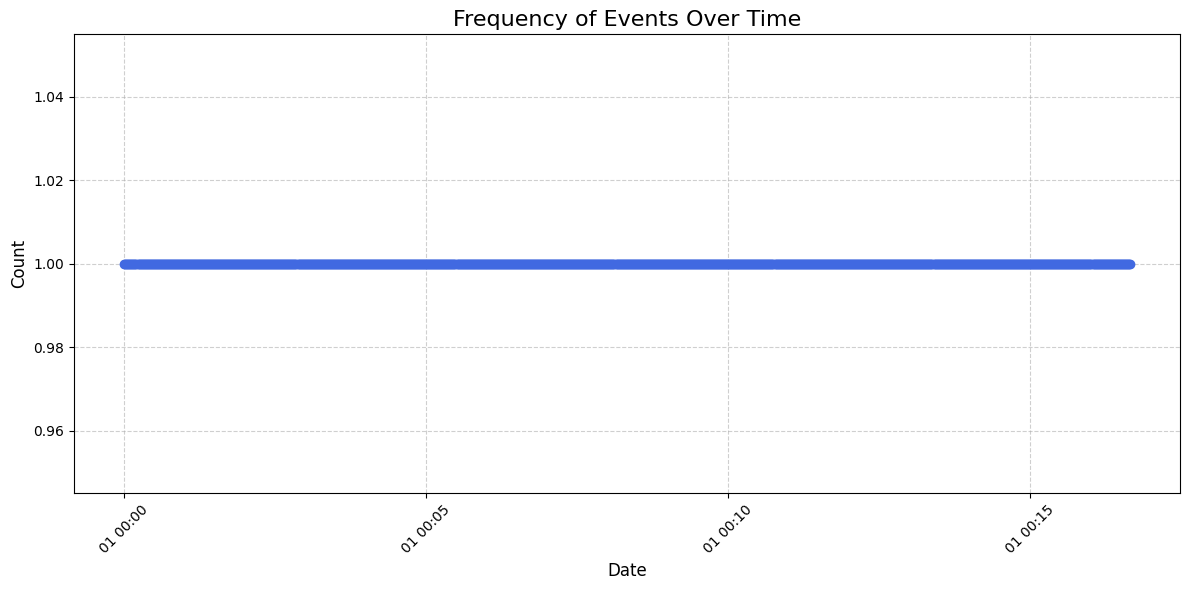

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Βεβαιώσου ότι η στήλη 'Time' είναι σε μορφή datetime
df['Time'] = pd.to_datetime(df['Time'])

# Υπολογίζουμε τις συχνότητες και τις ταξινομούμε χρονικά
time_counts = df['Time'].value_counts().sort_index()

# Δημιουργία γραφήματος
plt.figure(figsize=(12, 6))
plt.plot(time_counts.index, time_counts.values, color='royalblue', linewidth=2, marker='o')

# Προσθήκη τίτλων και ετικετών
plt.title('Frequency of Events Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Περιστροφή των ετικετών στον άξονα x
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


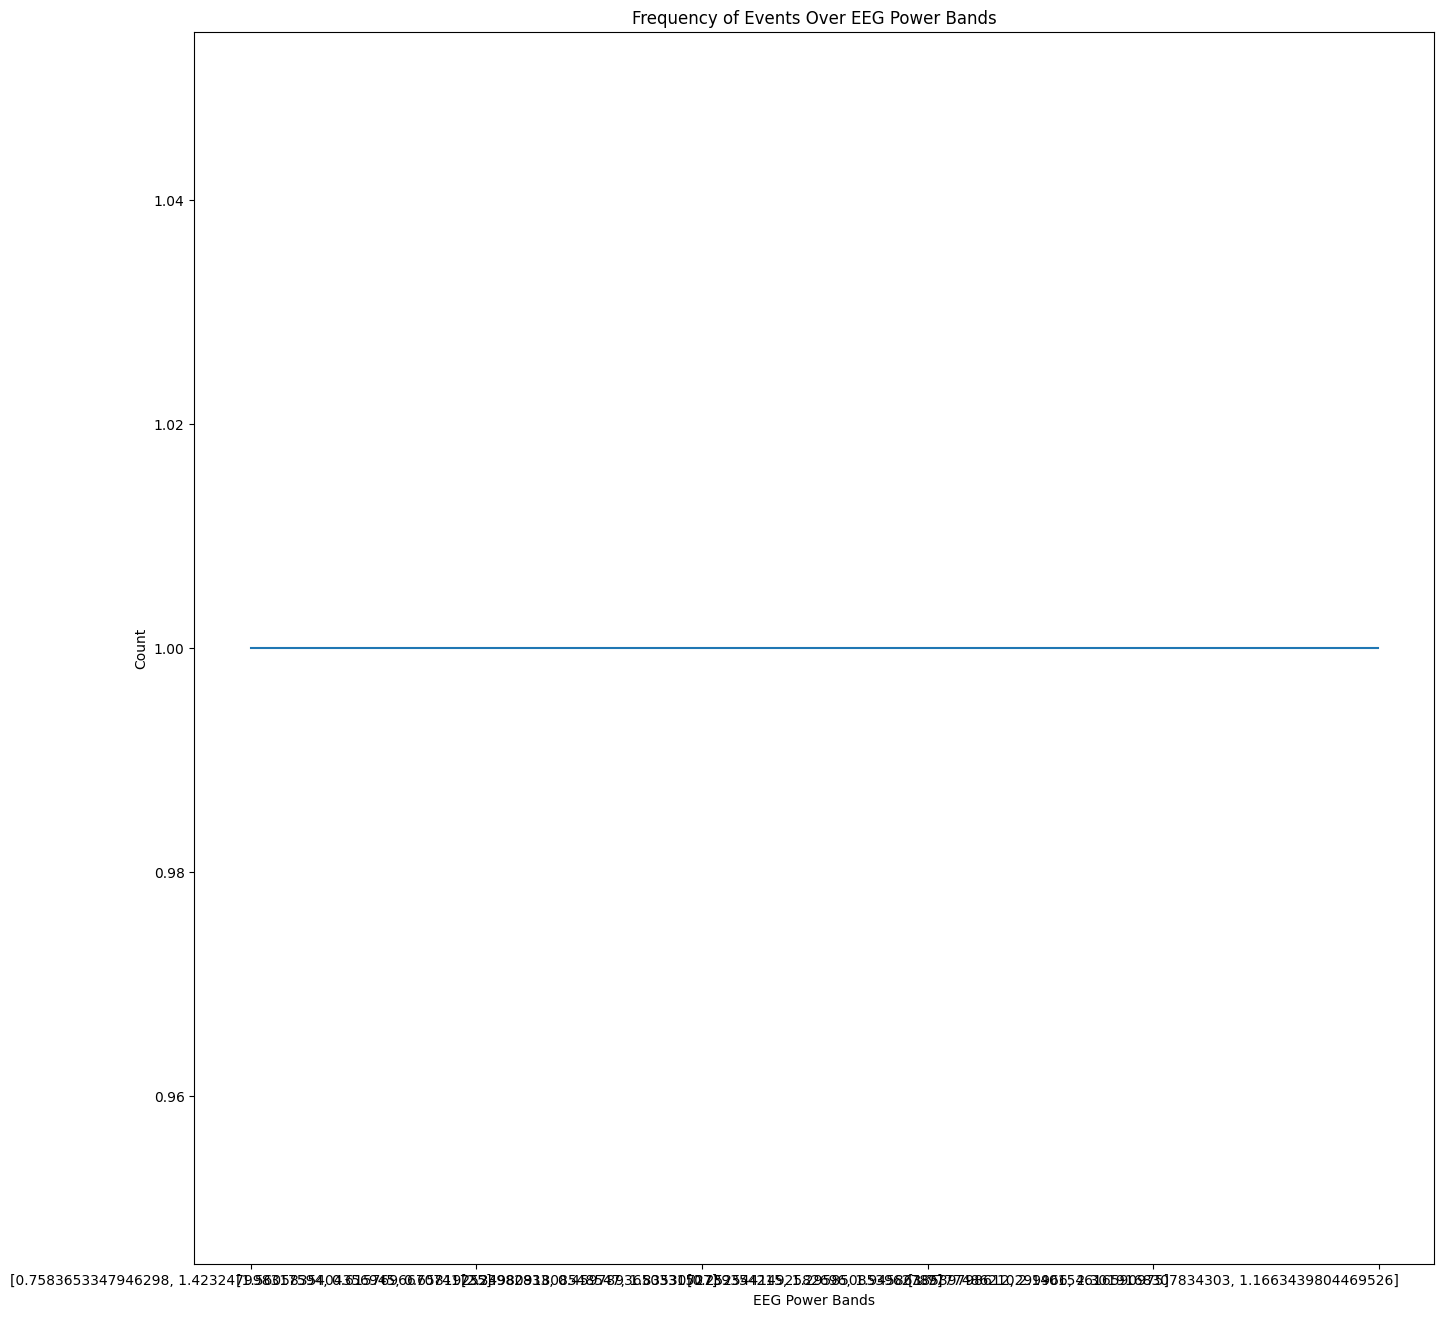

In [15]:
df['EEG Power Bands'].value_counts().plot(kind='line',figsize=(16,16))
plt.title('Frequency of Events Over EEG Power Bands')
plt.xlabel('EEG Power Bands')
plt.ylabel('Count')
plt.show()

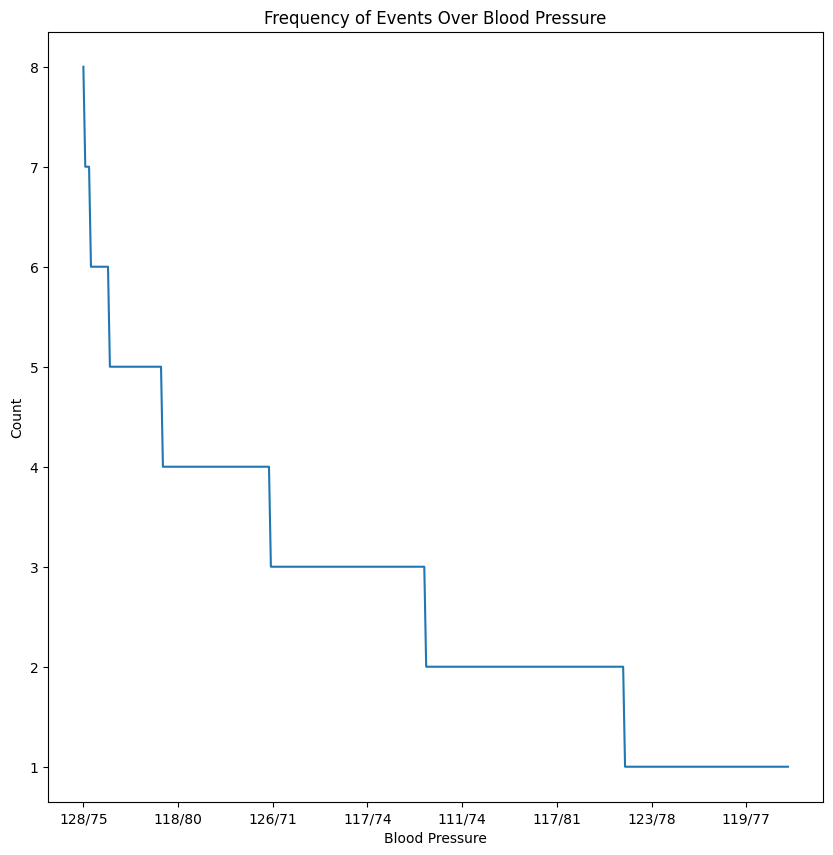

In [16]:
df['Blood Pressure (mmHg)'].value_counts().plot(kind='line',figsize=(10,10))
plt.title('Frequency of Events Over Blood Pressure')
plt.xlabel('Blood Pressure')
plt.ylabel('Count')
plt.show()

In [17]:
for col in df_categorical_type:
    print(f"{col}-->{df[col].isnull().sum()}")

Time-->0
EEG Power Bands-->0
Blood Pressure (mmHg)-->0
Cognitive Load-->0
Mood State-->0
Psychological State-->0
Task Type-->0
Gender-->0
Educational Level-->0
Study Major-->0


In [18]:
for numerical_data in df_numerical_type:
    print(numerical_data)
    print(df[numerical_data].describe())
    print()

ID
count    1000.000000
mean      500.500000
std       288.819436
min         1.000000
25%       250.750000
50%       500.500000
75%       750.250000
max      1000.000000
Name: ID, dtype: float64

HRV (ms)
count    1000.000000
mean       49.920454
std         9.863658
min        17.405557
25%        43.019097
50%        49.982476
75%        56.538365
max        78.841149
Name: HRV (ms), dtype: float64

GSR (μS)
count    1000.000000
mean        0.995749
std         0.285758
min         0.501567
25%         0.736509
50%         0.999965
75%         1.239964
max         1.499563
Name: GSR (μS), dtype: float64

Oxygen Saturation (%)
count    1000.000000
mean       97.419577
std         1.442865
min        95.001452
25%        96.154447
50%        97.395945
75%        98.643364
max        99.997277
Name: Oxygen Saturation (%), dtype: float64

Heart Rate (BPM)
count    1000.000000
mean       78.829000
std        11.818097
min        60.000000
25%        68.000000
50%        78.000000
75%    

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


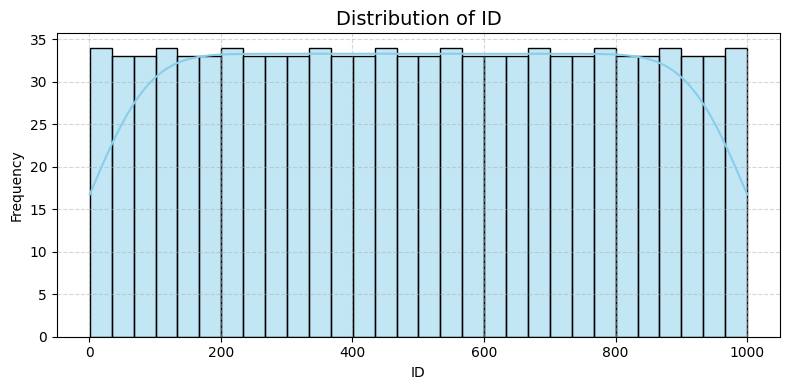

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


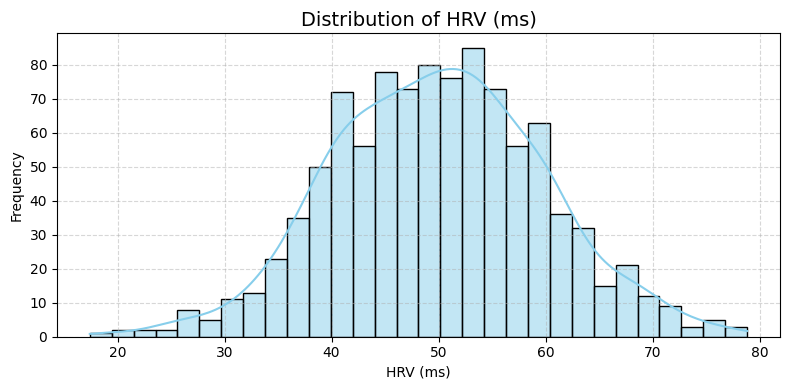

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


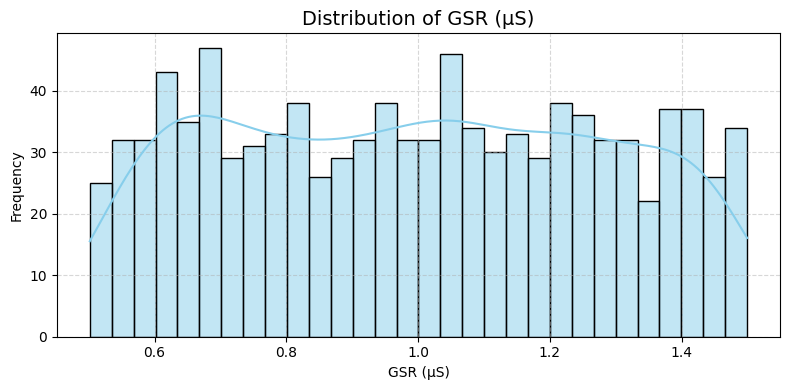

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


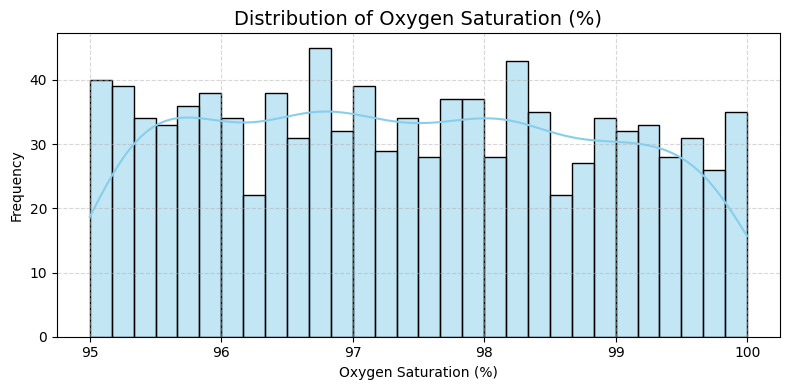

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


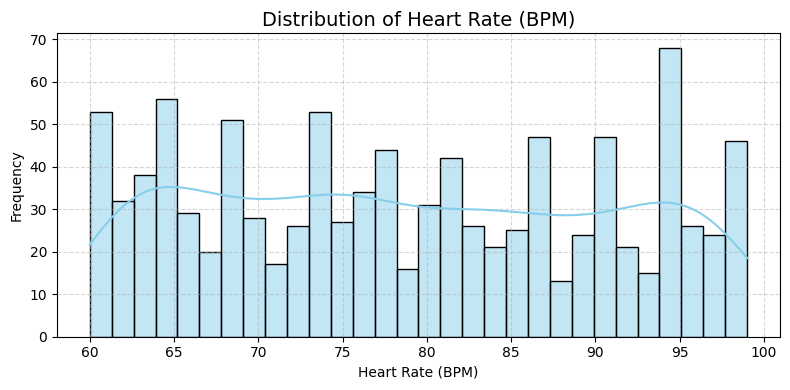

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


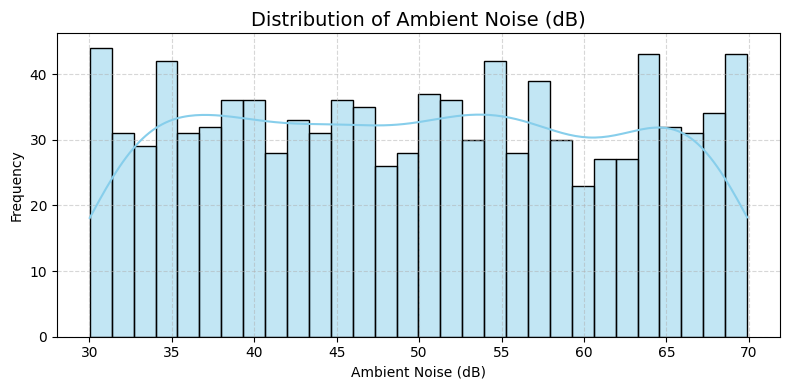

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


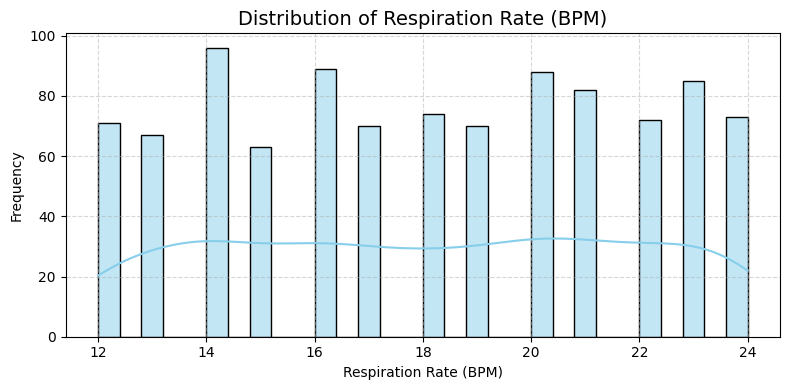

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


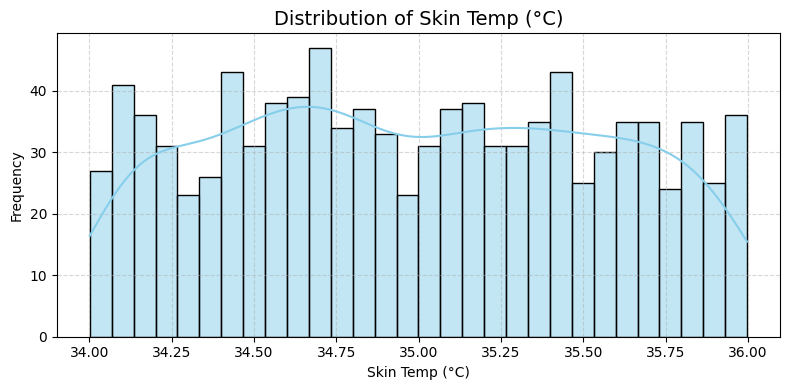

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


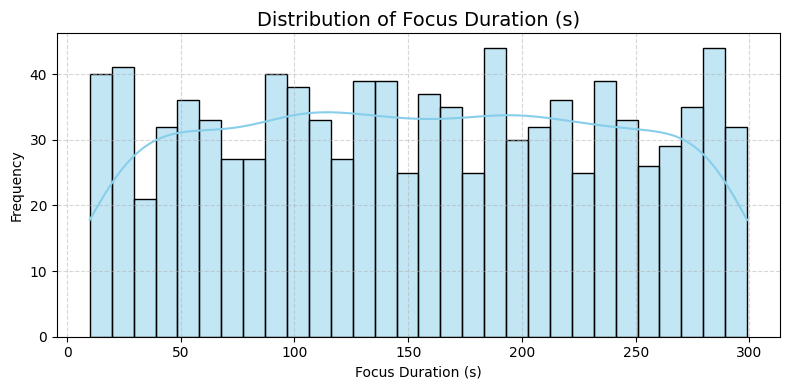

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


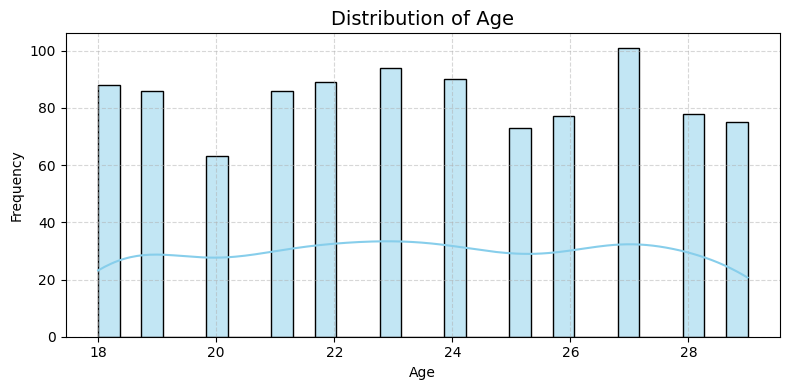

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

for numerical_data in df_numerical_type:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[numerical_data], bins=30, kde=True, color='skyblue')
    plt.title(f"Distribution of {numerical_data}", fontsize=14)
    plt.xlabel(numerical_data)
    plt.ylabel("Frequency")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

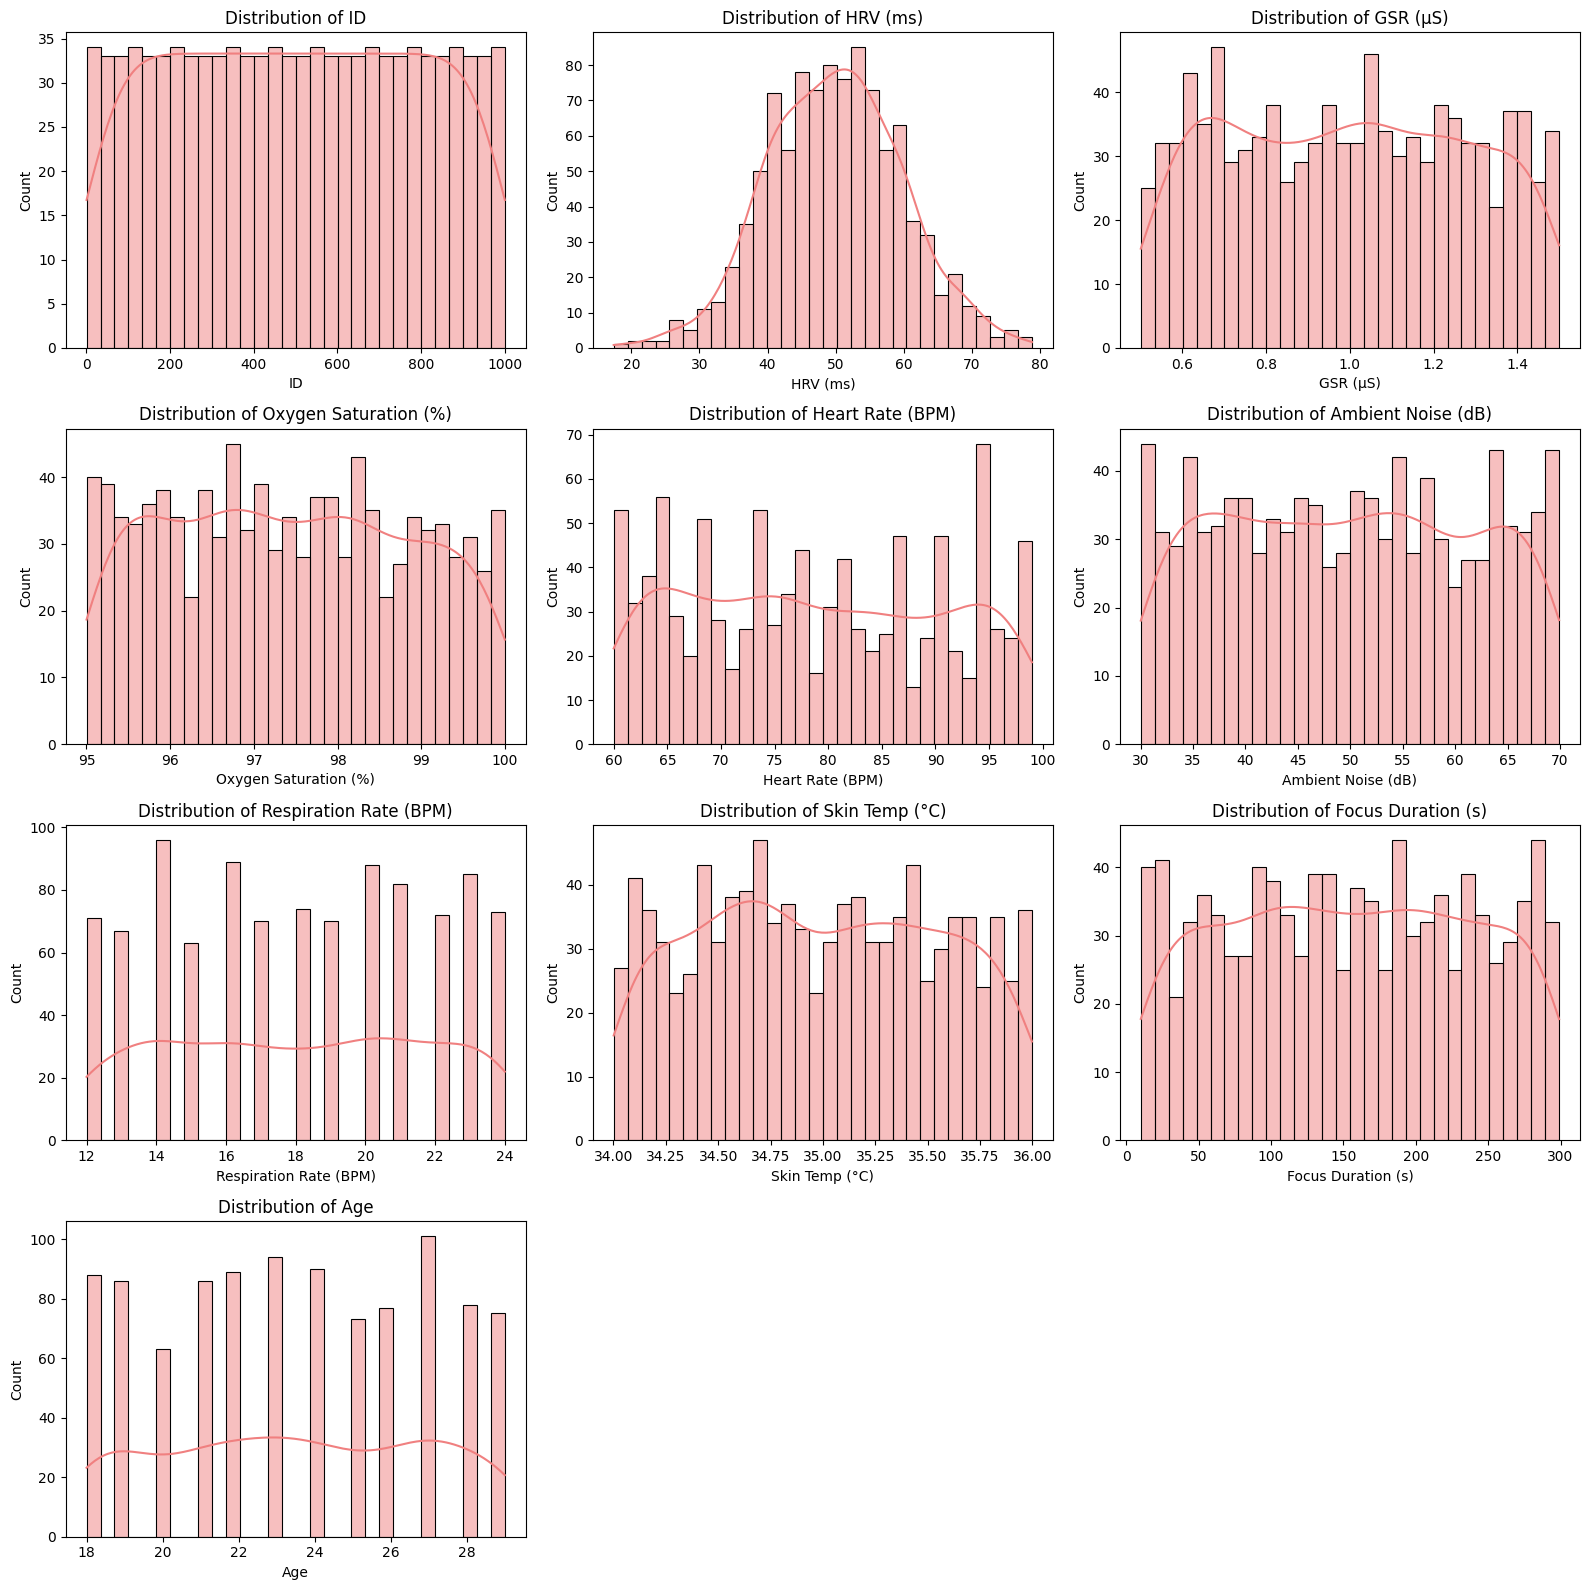

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

n = len(df_numerical_type)
cols = 3  # π.χ. 3 στήλες
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 4))
axes = axes.flatten()

for i, numerical_data in enumerate(df_numerical_type):
    sns.histplot(df[numerical_data], bins=30, kde=True, ax=axes[i], color='lightcoral')
    axes[i].set_title(f"Distribution of {numerical_data}")

# Αν υπάρχουν λιγότερα plots από axes, κρύψ' τα
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


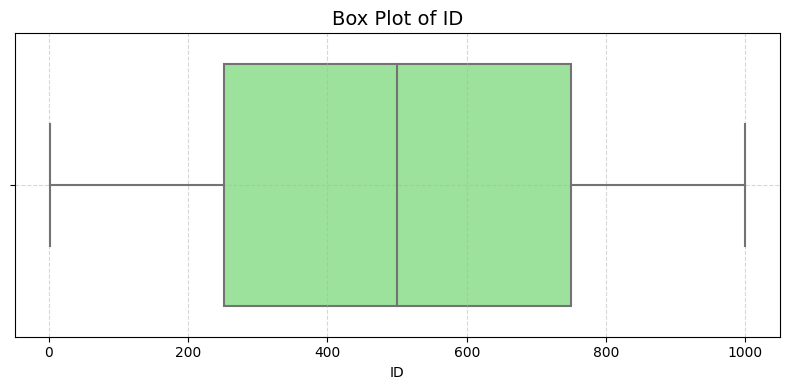

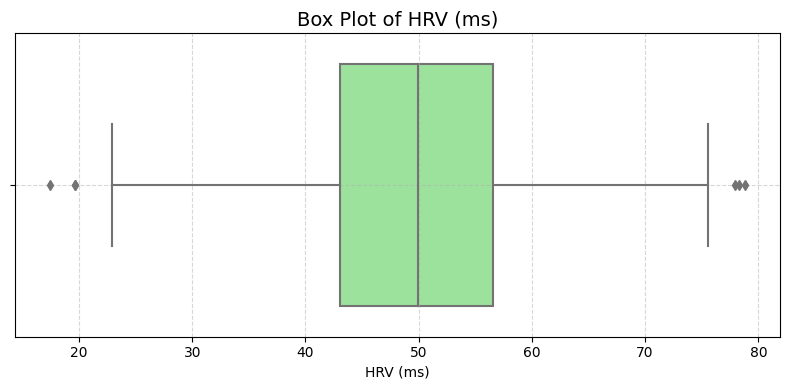

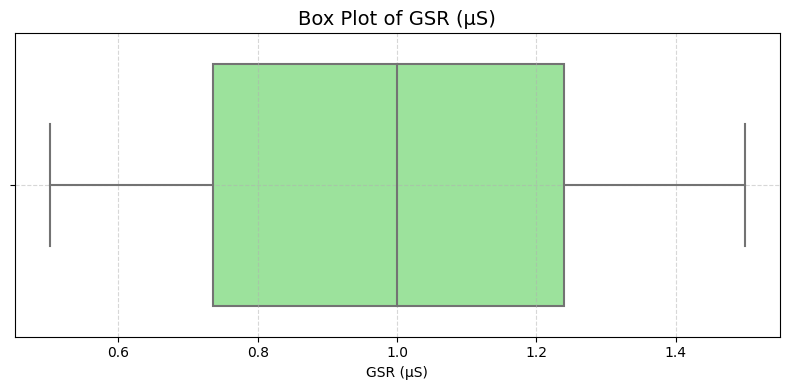

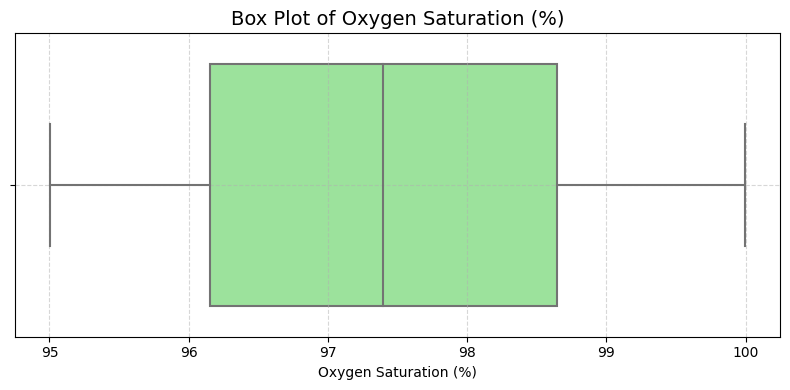

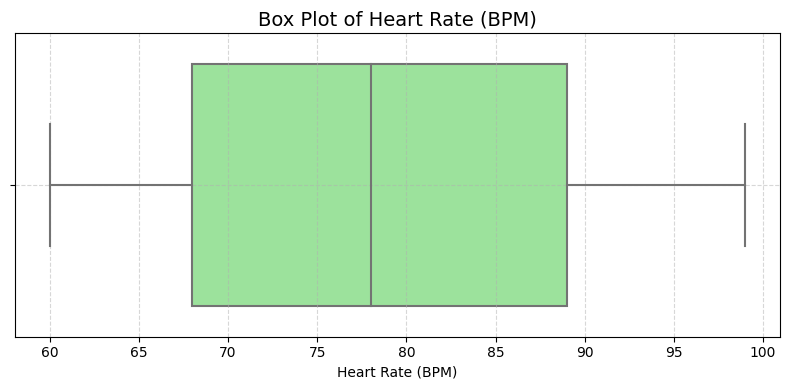

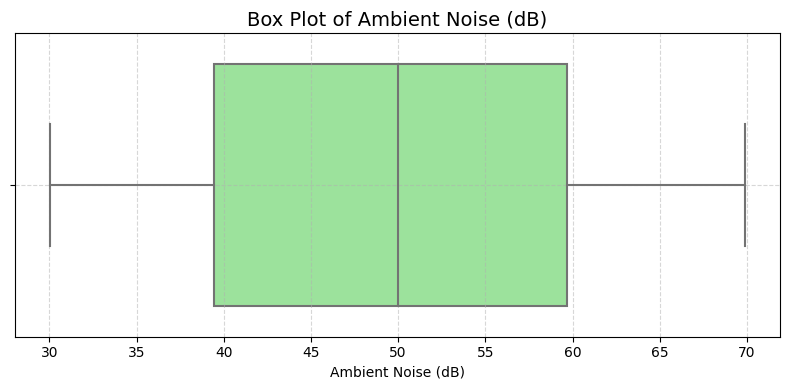

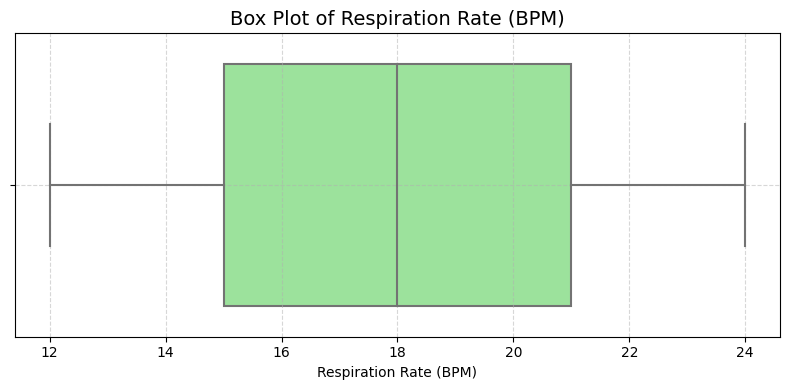

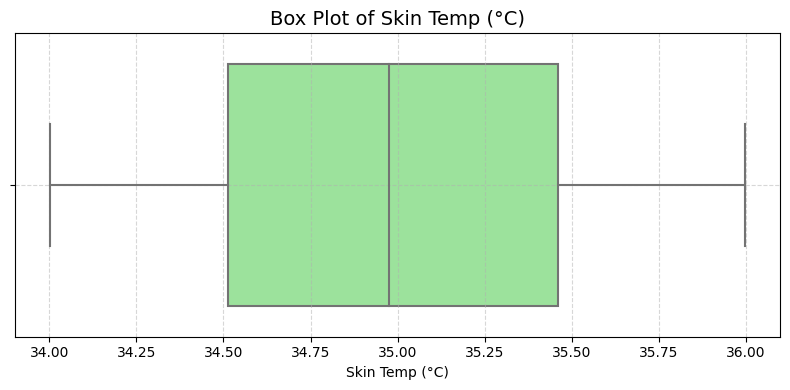

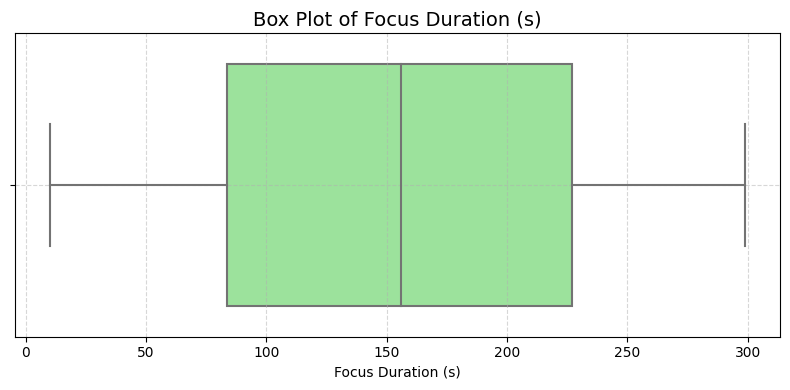

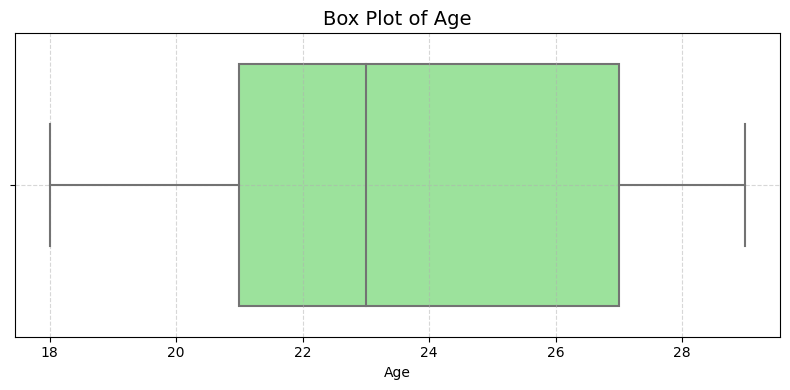

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

for numerical_data in df_numerical_type:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[numerical_data], color='lightgreen')
    plt.title(f"Box Plot of {numerical_data}", fontsize=14)
    plt.xlabel(numerical_data)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


In [23]:
for col in df_numerical_type:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f"{col}: {len(outliers)} outliers")


ID: 0 outliers
HRV (ms): 6 outliers
GSR (μS): 0 outliers
Oxygen Saturation (%): 0 outliers
Heart Rate (BPM): 0 outliers
Ambient Noise (dB): 0 outliers
Respiration Rate (BPM): 0 outliers
Skin Temp (°C): 0 outliers
Focus Duration (s): 0 outliers
Age: 0 outliers


In [24]:
for numerical_data in df_numerical_type:
    print(f"Numerical Column: {numerical_data}")
    print(f"Missing values: {df[numerical_data].isnull().sum()}")
    print("-" * 40)


Numerical Column: ID
Missing values: 0
----------------------------------------
Numerical Column: HRV (ms)
Missing values: 0
----------------------------------------
Numerical Column: GSR (μS)
Missing values: 0
----------------------------------------
Numerical Column: Oxygen Saturation (%)
Missing values: 0
----------------------------------------
Numerical Column: Heart Rate (BPM)
Missing values: 0
----------------------------------------
Numerical Column: Ambient Noise (dB)
Missing values: 0
----------------------------------------
Numerical Column: Respiration Rate (BPM)
Missing values: 0
----------------------------------------
Numerical Column: Skin Temp (°C)
Missing values: 0
----------------------------------------
Numerical Column: Focus Duration (s)
Missing values: 0
----------------------------------------
Numerical Column: Age
Missing values: 0
----------------------------------------


In [25]:
for col in df_numerical_type:
    missing = df[col].isnull().sum()
    if missing > 0:
        print(f"{col}: {missing} missing values")


In [26]:
df[df_numerical_type].isnull().sum().sort_values(ascending=False)


ID                        0
HRV (ms)                  0
GSR (μS)                  0
Oxygen Saturation (%)     0
Heart Rate (BPM)          0
Ambient Noise (dB)        0
Respiration Rate (BPM)    0
Skin Temp (°C)            0
Focus Duration (s)        0
Age                       0
dtype: int64

In [27]:
# Checking skewness for numerical columns
for numerical_col in df_numerical_type:
    skewness = df[numerical_col].skew()
    print(f"Skewness of {numerical_col}: {skewness:.4f}")


Skewness of ID: 0.0000
Skewness of HRV (ms): 0.0083
Skewness of GSR (μS): 0.0320
Skewness of Oxygen Saturation (%): 0.0629
Skewness of Heart Rate (BPM): 0.0810
Skewness of Ambient Noise (dB): 0.0236
Skewness of Respiration Rate (BPM): -0.0171
Skewness of Skin Temp (°C): 0.0367
Skewness of Focus Duration (s): -0.0016
Skewness of Age: -0.0163


Skewness ≈ 0 → Κανονική κατανομή

Skewness > 0 → Δεξιά ουρά (δεξιά skewed)

Skewness < 0 → Αριστερή ουρά (αριστερά skewed)

|Skewness| > 1 → Υψηλά skewed → ίσως χρειάζεται μετασχηματισμός (π.χ. log)

In [28]:
high_skew = {col: df[col].skew() for col in df_numerical_type if abs(df[col].skew()) > 1}

print("Columns with high skewness:")
for col, skew in high_skew.items():
    print(f"{col}: {skew:.4f}")


Columns with high skewness:


In [29]:
import numpy as np

# Εφαρμόζουμε log μετασχηματισμό στις στήλες με skewness > 1 ή < -1
for col, skew in high_skew.items():
    if df[col].min() > 0:  # Πρέπει να είναι θετικές οι τιμές
        df[col] = np.log1p(df[col])  # log1p(x) = log(x + 1) για αποφυγή αρνητικών τιμών
        print(f"Applied log transformation to {col}")


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Οπτικοποιούμε την κατανομή πριν και μετά τον log μετασχηματισμό
for col, skew in high_skew.items():
    plt.figure(figsize=(12, 6))
    
    # Πριν τον μετασχηματισμό
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, color='lightcoral')
    plt.title(f"Before Log Transformation: {col}")
    
    # Μετά τον μετασχηματισμό
    plt.subplot(1, 2, 2)
    sns.histplot(np.log1p(df[col]), kde=True, color='lightgreen')
    plt.title(f"After Log Transformation: {col}")
    
    plt.tight_layout()
    plt.show()


In [31]:
# Ελέγχουμε ποιες στήλες έχουν μεγάλο skewness
high_skew = {col: df[col].skew() for col in df_numerical_type if abs(df[col].skew()) > 1}

# Εμφανίζουμε τις στήλες με μεγάλο skewness
print("Columns with high skewness:")
for col, skew in high_skew.items():
    print(f"{col}: {skew:.4f}")


Columns with high skewness:


In [32]:
import numpy as np

# Εφαρμόζουμε log μετασχηματισμό στις στήλες με skewness > 1 ή < -1
for col, skew in high_skew.items():
    if df[col].min() > 0:  # Πρέπει να είναι θετικές οι τιμές
        df[col] = np.log1p(df[col])  # log1p(x) = log(x + 1) για αποφυγή αρνητικών τιμών
        print(f"Applied log transformation to {col}")


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Οπτικοποιούμε την κατανομή πριν και μετά τον log μετασχηματισμό
for col, skew in high_skew.items():
    plt.figure(figsize=(12, 6))
    
    # Πριν τον μετασχηματισμό
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, color='lightcoral')
    plt.title(f"Before Log Transformation: {col}")
    
    # Μετά τον μετασχηματισμό
    plt.subplot(1, 2, 2)
    sns.histplot(np.log1p(df[col]), kde=True, color='lightgreen')
    plt.title(f"After Log Transformation: {col}")
    
    plt.tight_layout()
    plt.show()


In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Εφαρμόζουμε την κανονικοποίηση (Z-Score) σε όλες τις αριθμητικές στήλες
df[df_numerical_type] = scaler.fit_transform(df[df_numerical_type])

print("Z-Score Normalization applied.")


Z-Score Normalization applied.


In [37]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

# Εφαρμόζουμε την κανονικοποίηση Min-Max σε όλες τις αριθμητικές στήλες
df[df_numerical_type] = min_max_scaler.fit_transform(df[df_numerical_type])

print("Min-Max Scaling applied.")


Min-Max Scaling applied.


In [38]:
df_numerical_type

['ID',
 'HRV (ms)',
 'GSR (μS)',
 'Oxygen Saturation (%)',
 'Heart Rate (BPM)',
 'Ambient Noise (dB)',
 'Respiration Rate (BPM)',
 'Skin Temp (°C)',
 'Focus Duration (s)',
 'Age']

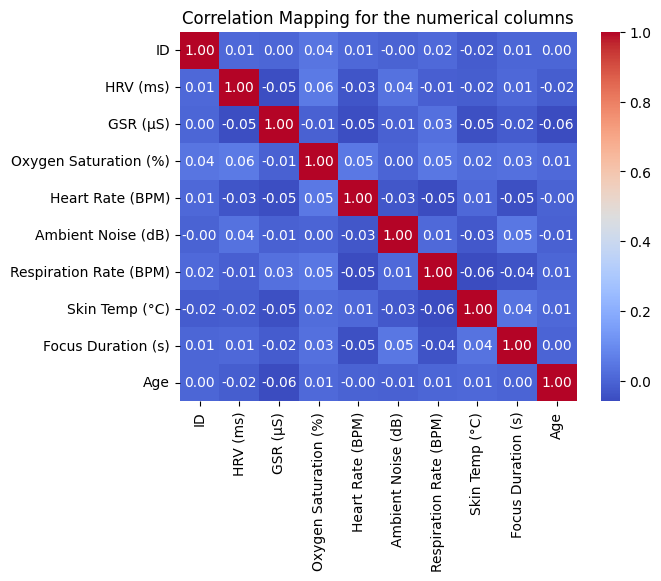

In [39]:
corr_matrix=df[df_numerical_type].corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Correlation Mapping for the numerical columns")
plt.show()

Missing values:
 ID                        0
Time                      0
HRV (ms)                  0
GSR (μS)                  0
EEG Power Bands           0
Blood Pressure (mmHg)     0
Oxygen Saturation (%)     0
Heart Rate (BPM)          0
Ambient Noise (dB)        0
Cognitive Load            0
Mood State                0
Psychological State       0
Respiration Rate (BPM)    0
Skin Temp (°C)            0
Focus Duration (s)        0
Task Type                 0
Age                       0
Gender                    0
Educational Level         0
Study Major               0
dtype: int64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

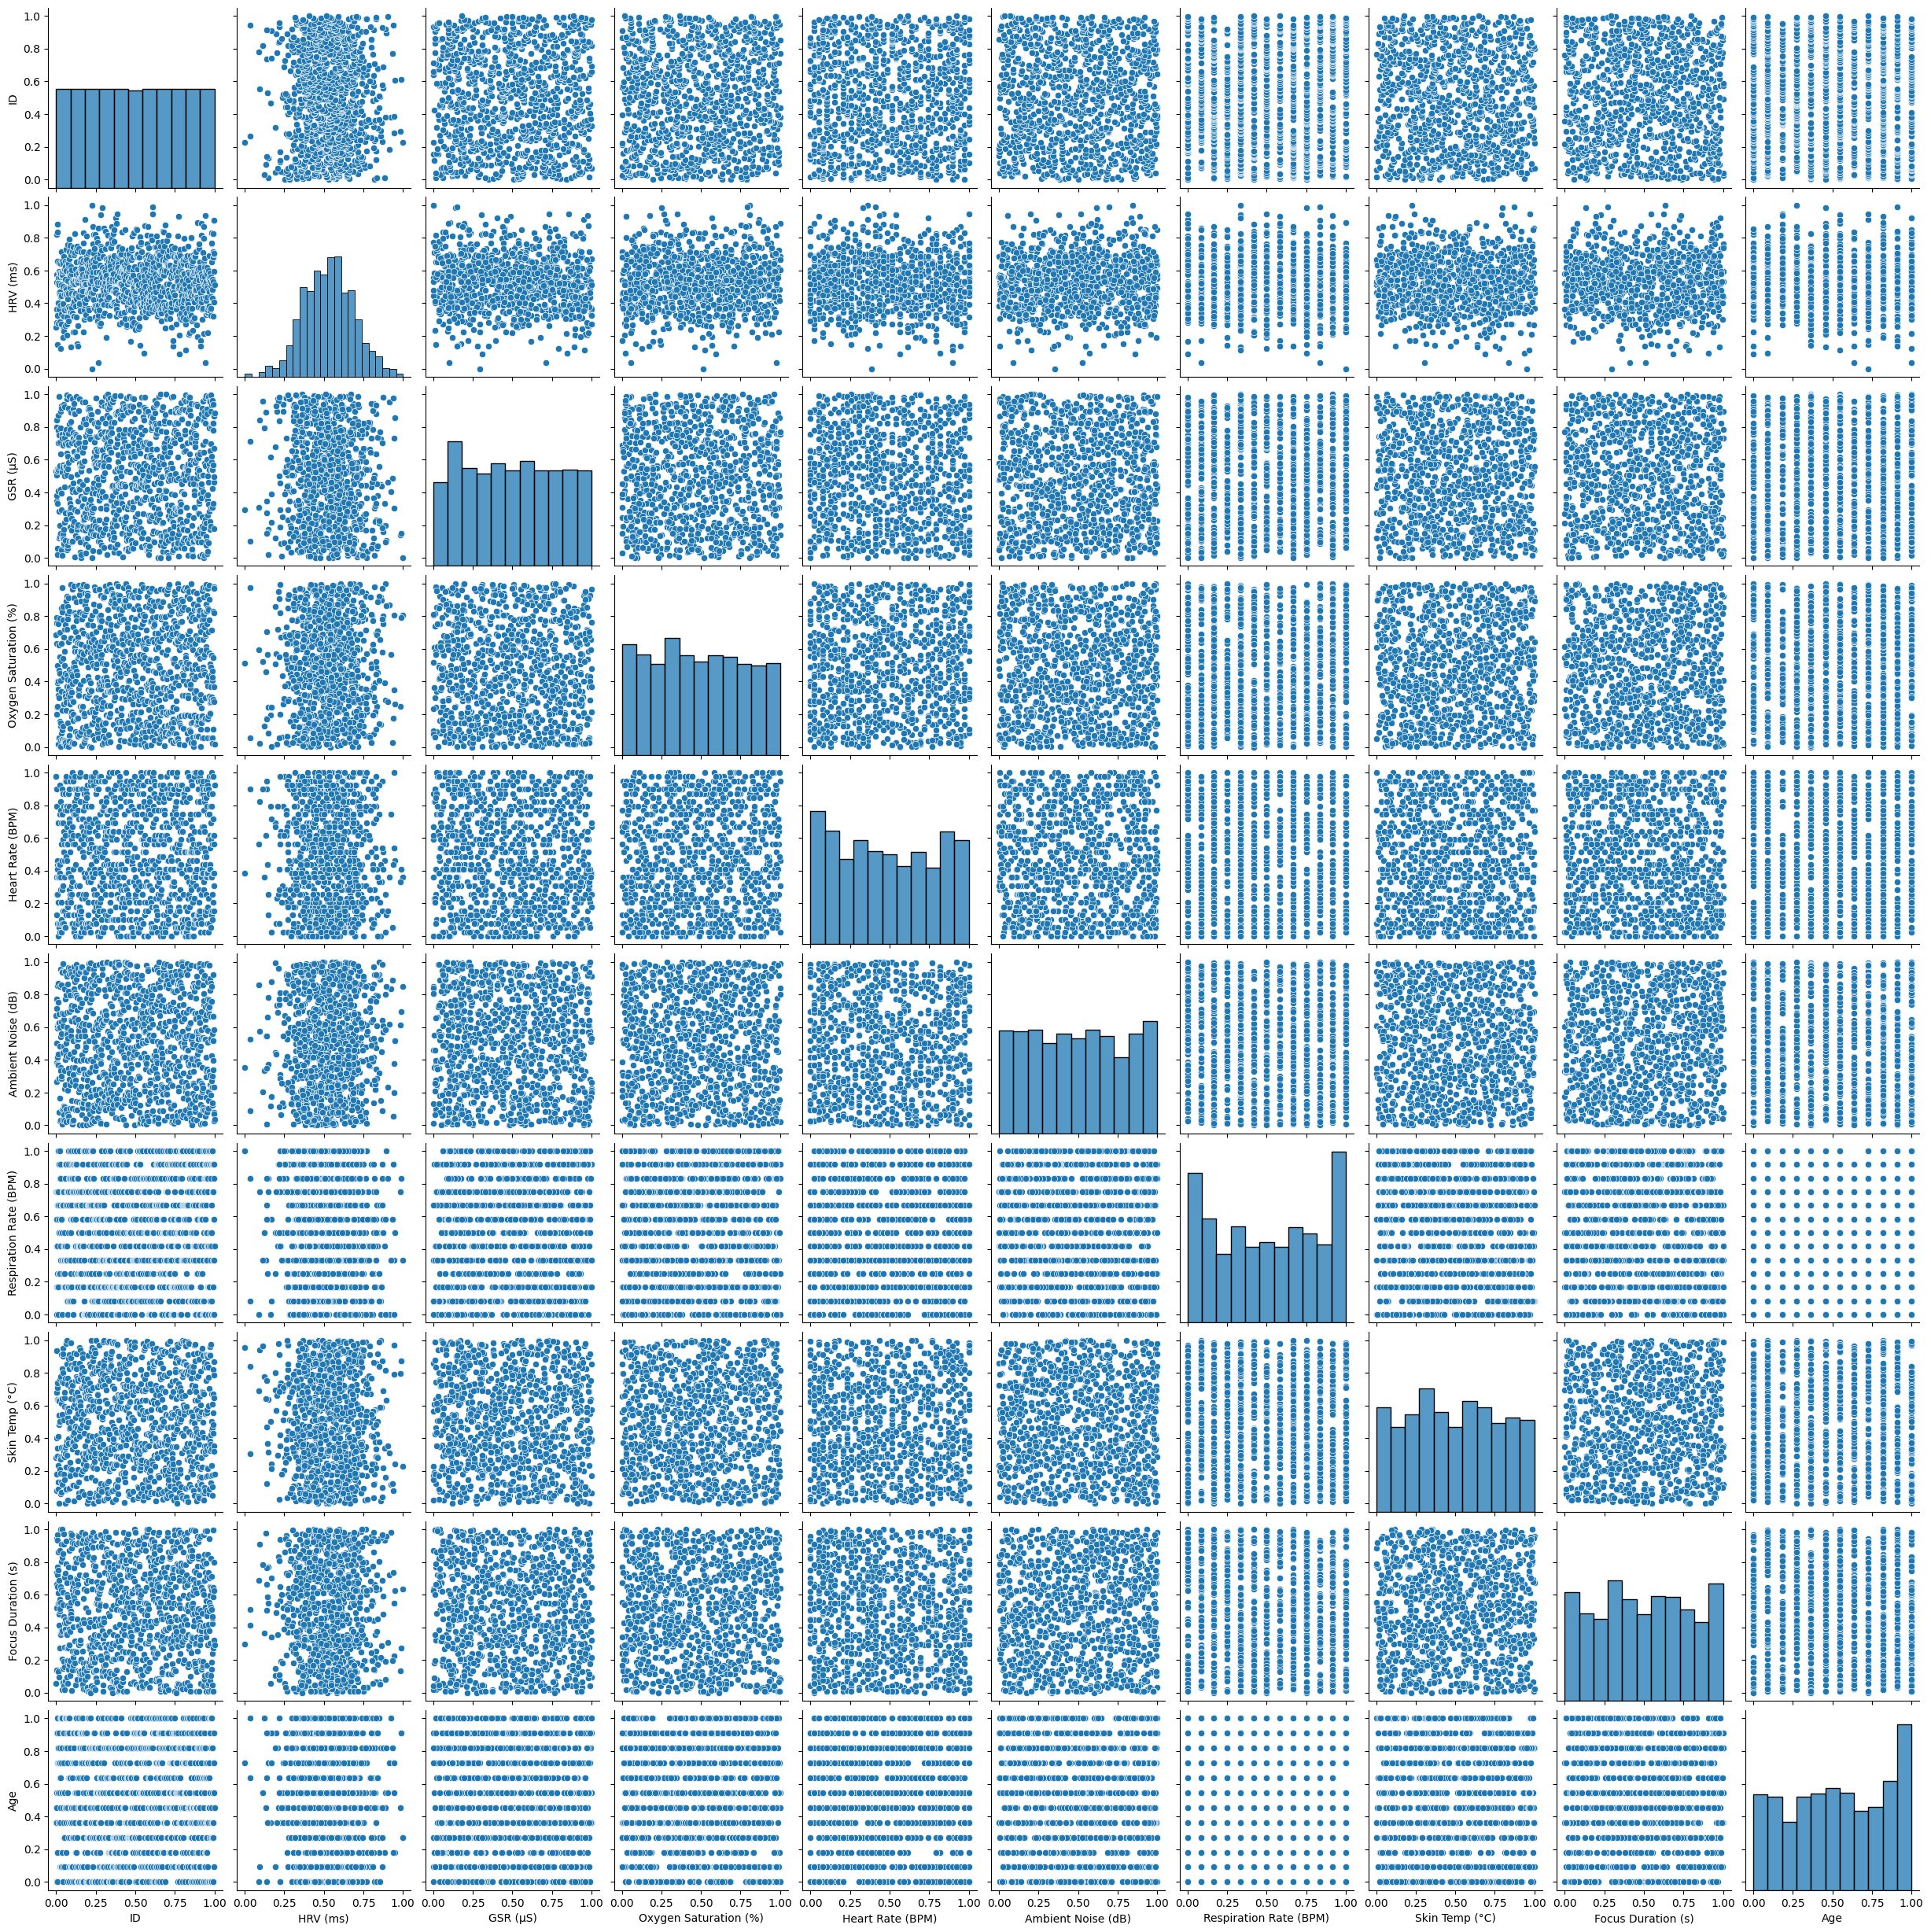

In [40]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

df_cleaned = df.dropna(subset=df_numerical_type)

# Verify the data is clean
print("Missing values:\n", df_cleaned.isnull().sum())

# Create pairplot
sns.pairplot(df_cleaned[df_numerical_type])
plt.show()

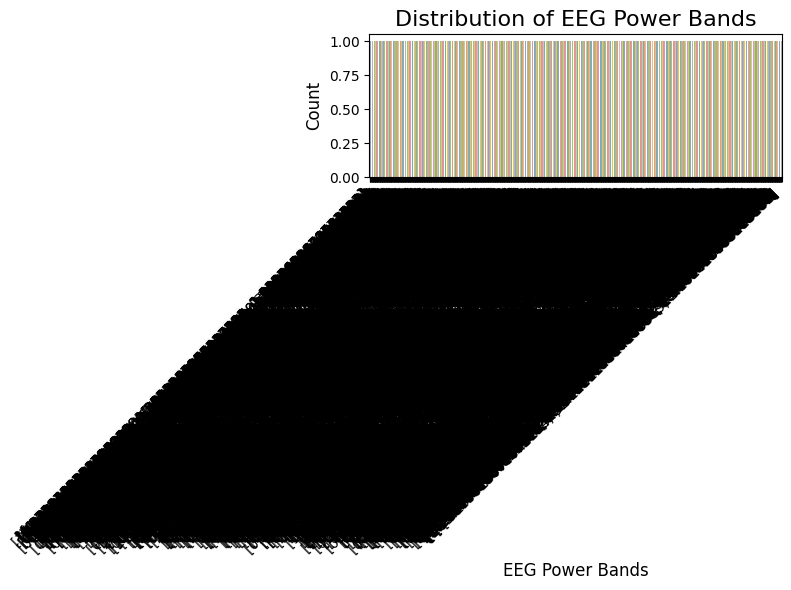

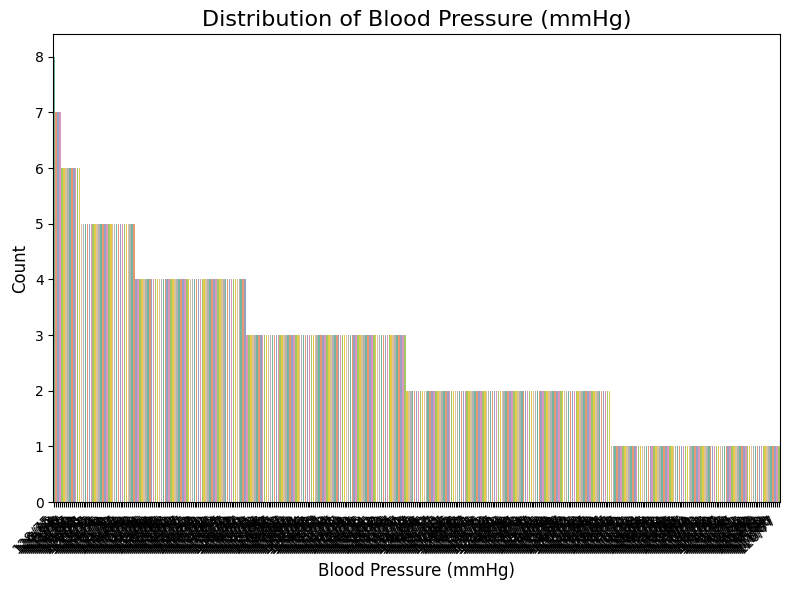

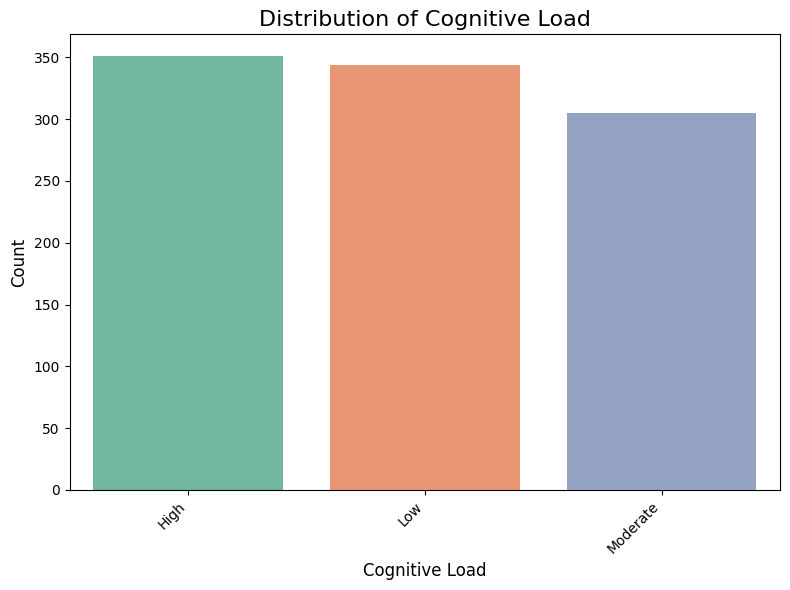

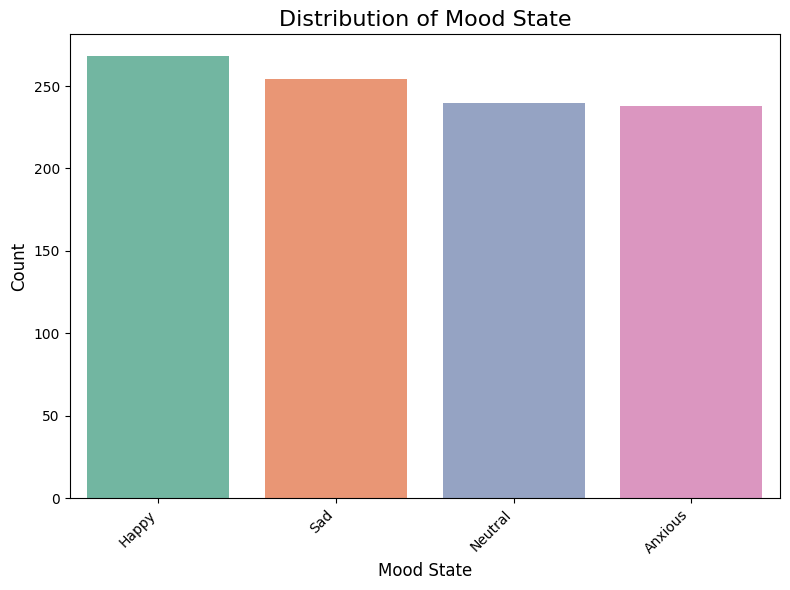

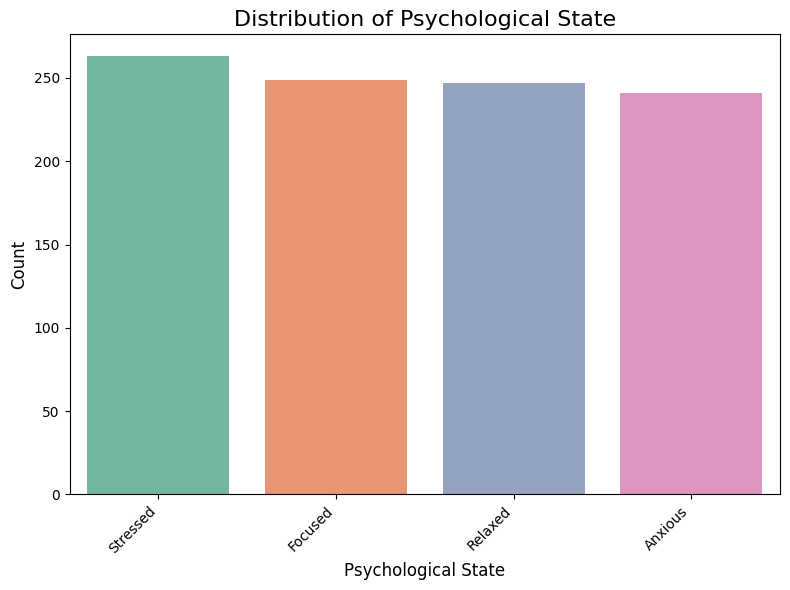

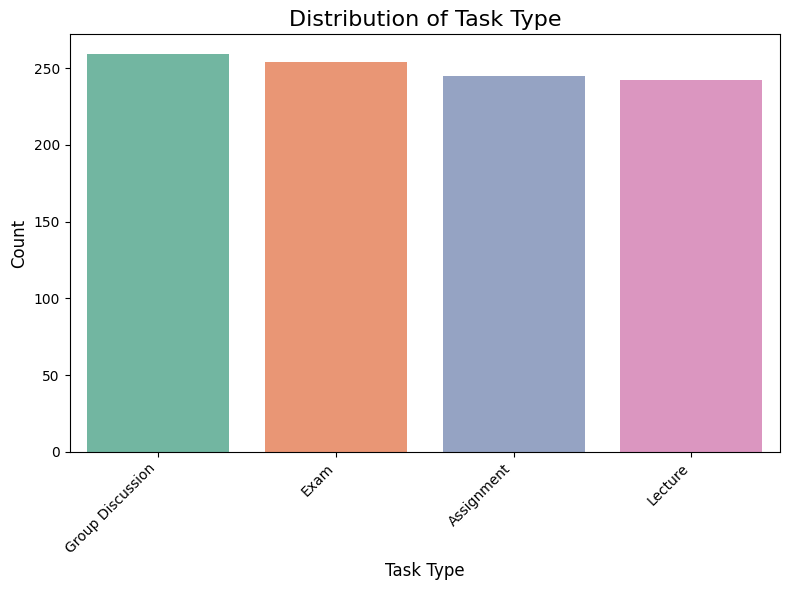

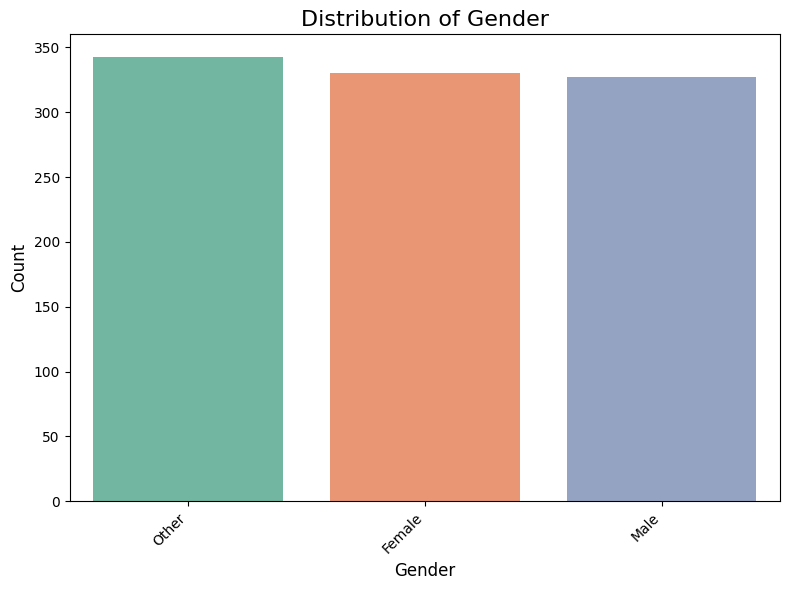

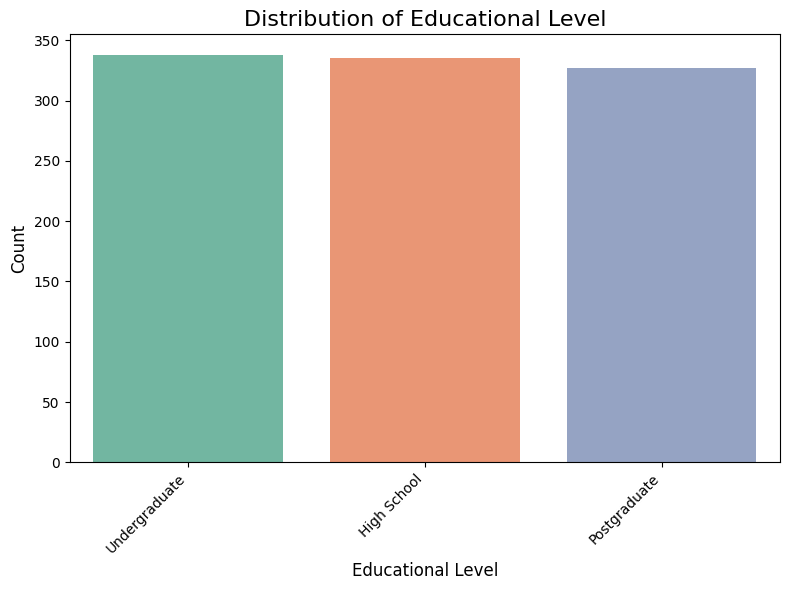

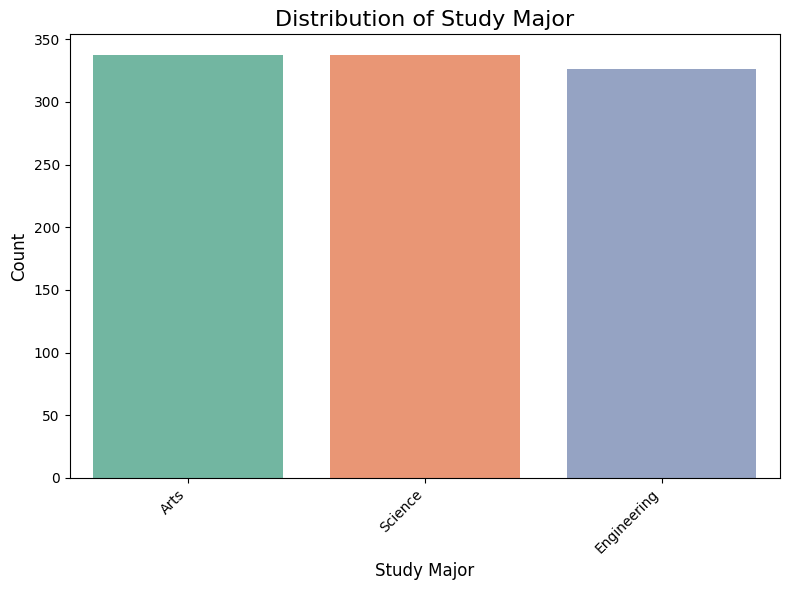

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ορισμός κατηγορηματικών στηλών
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Δημιουργία countplots για κάθε κατηγορηματική στήλη
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=df[col], order=df[col].value_counts().index, palette='Set2')
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.tight_layout()  # Για να αποφευχθεί η επικαλυπτόμενη εμφάνιση των labels
    plt.show()



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


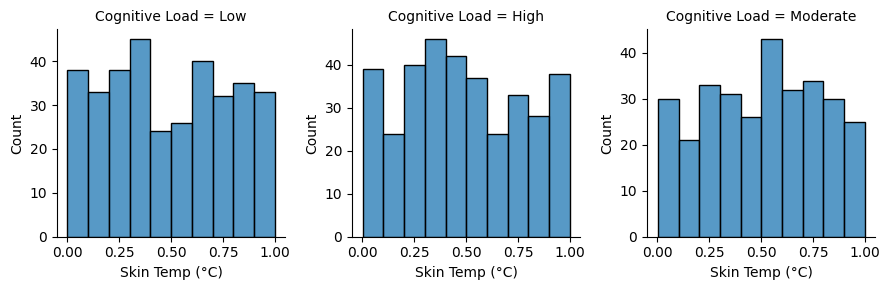

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

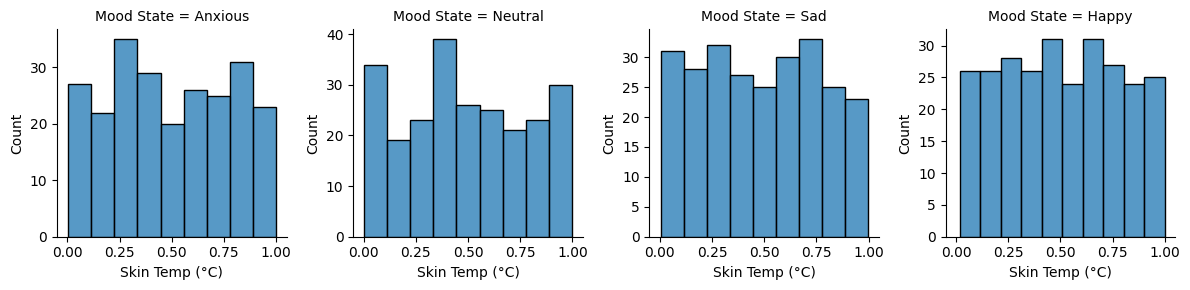

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

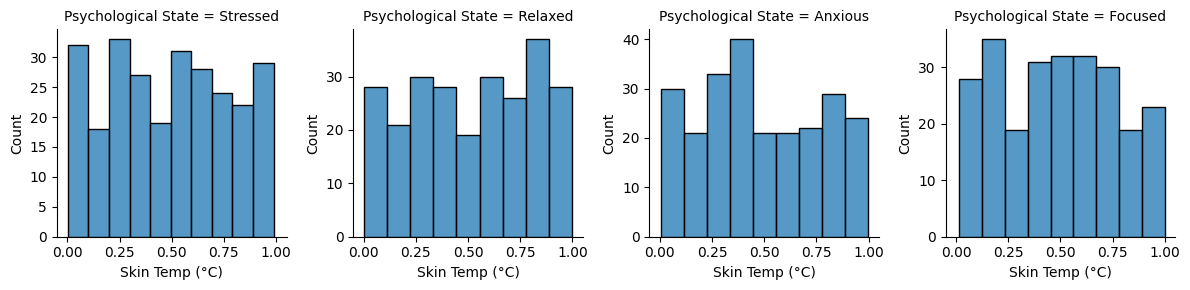

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

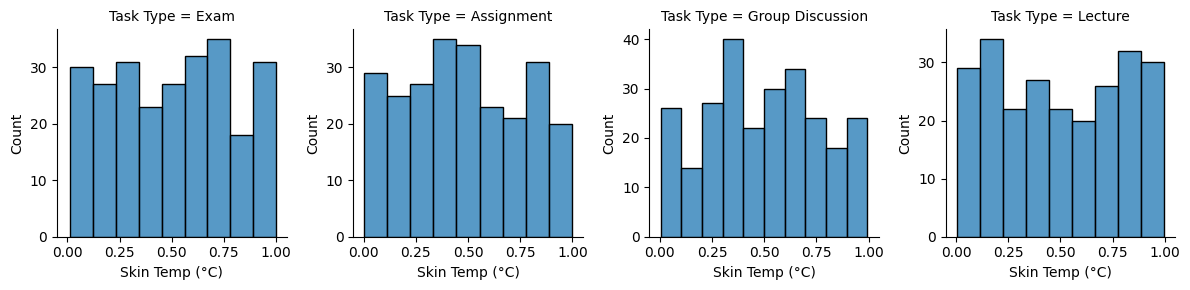

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


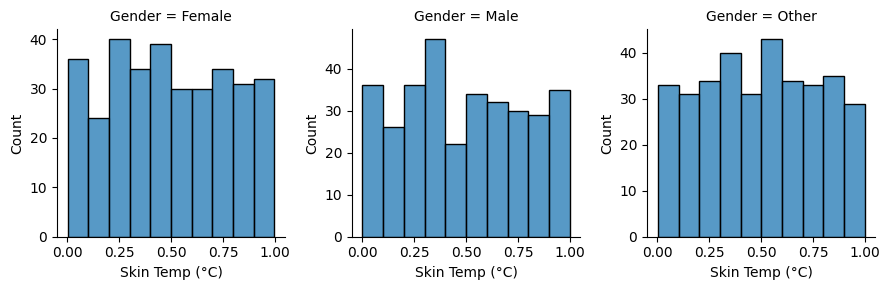

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


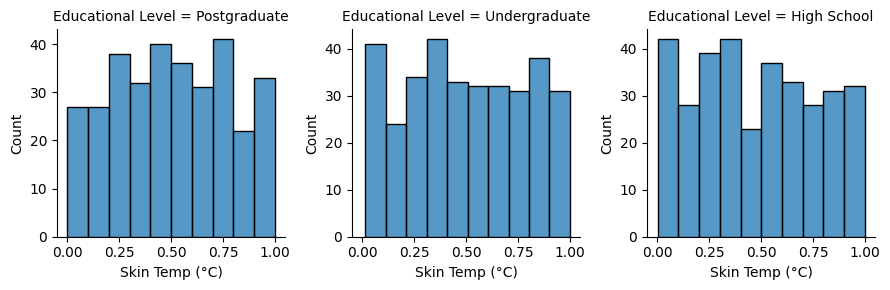

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


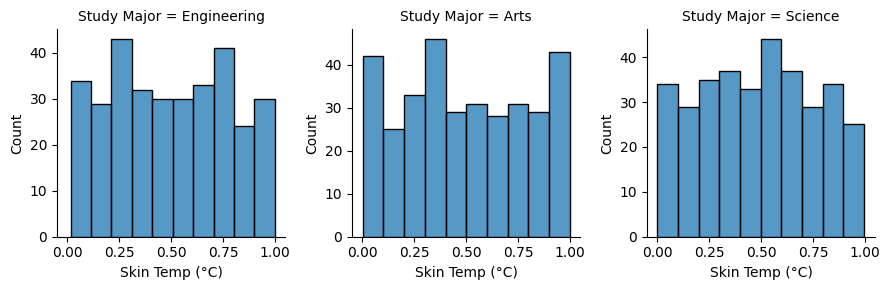

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Επιλογή κατηγορηματικών στηλών (αν δεν το έχεις κάνει ήδη)
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Δημιουργία FacetGrid για κατηγορηματικές στήλες με λίγες μοναδικές τιμές
for cat_col in categorical_columns:
    if df[cat_col].nunique() < 5:  # Περιορίζουμε στις κατηγορηματικές στήλες με λίγες μοναδικές τιμές
        g = sns.FacetGrid(df, col=cat_col, sharey=False)
        g.map(sns.histplot, "Skin Temp (°C)")  # Σωστό όνομα στήλης χωρίς το "}"
        plt.show()



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


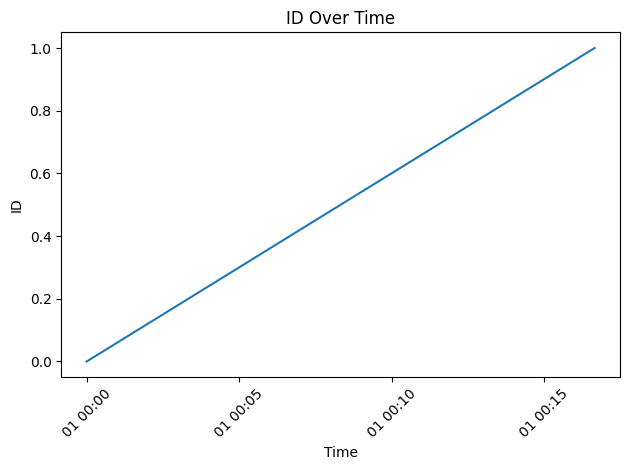

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


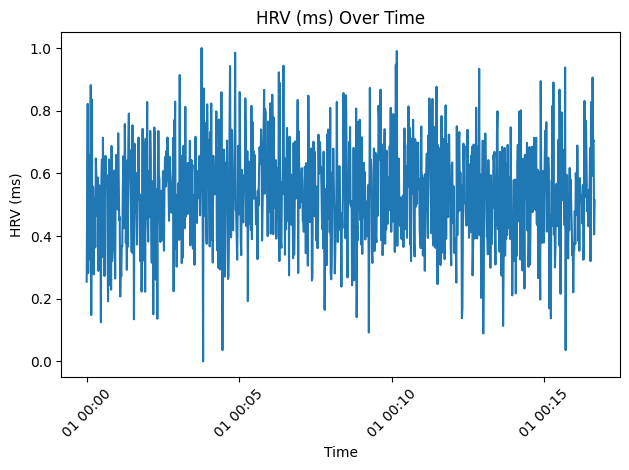

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


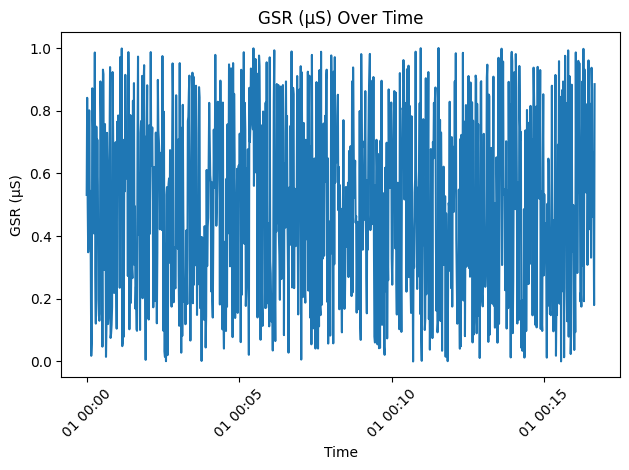

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


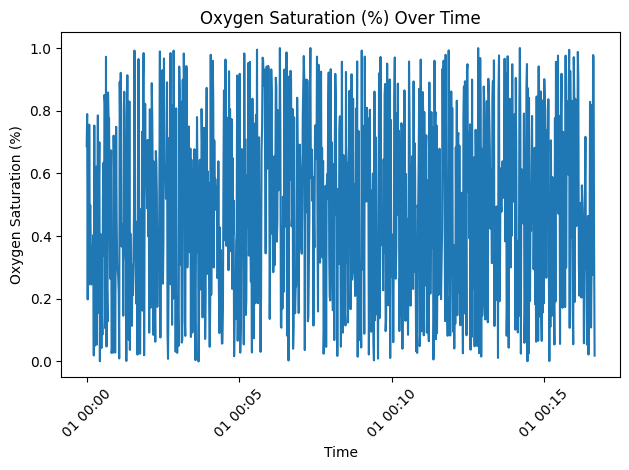

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


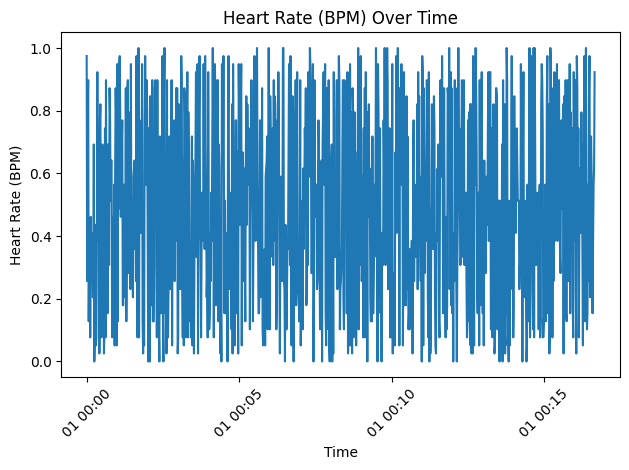

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


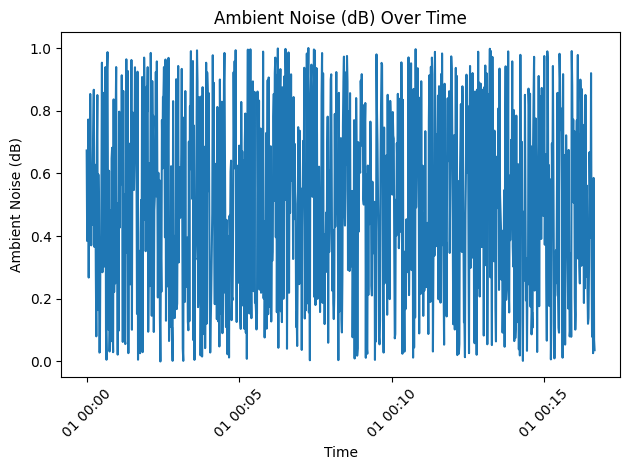

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


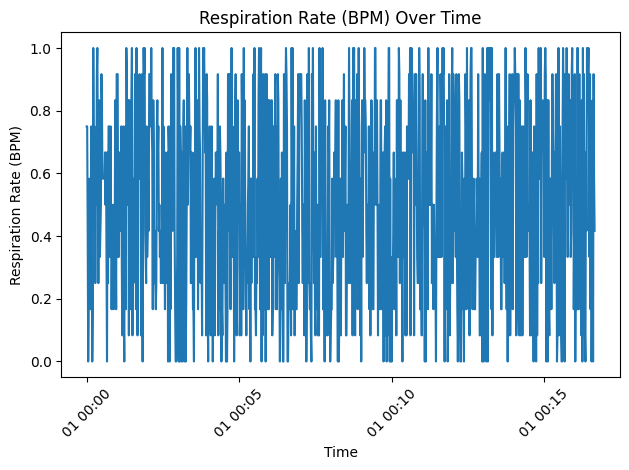

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


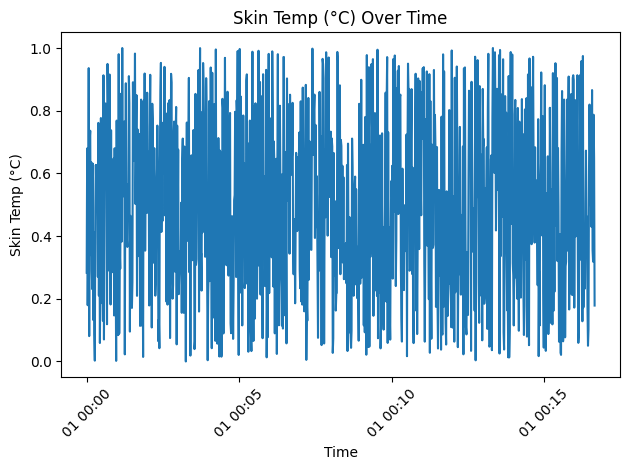

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


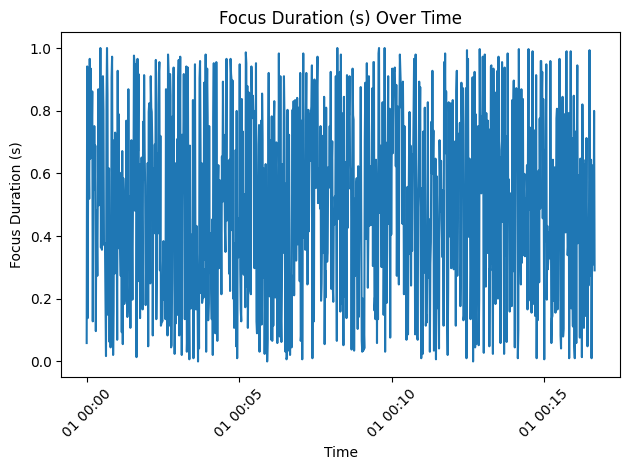

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


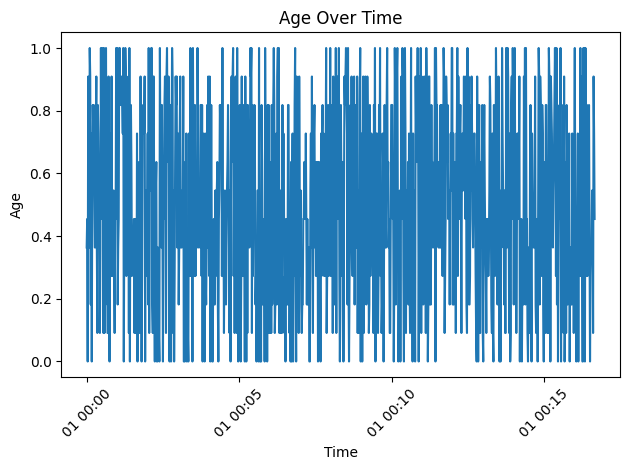

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ορισμός των αριθμητικών στηλών
numerical_columns = df.select_dtypes(include=['number']).columns

# Έλεγχος αν η στήλη 'Time' υπάρχει και αν είναι κατηγορική (ή αντικείμενο)
if 'Time' in df.columns:
    # Μετατροπή της στήλης 'Time' σε datetime
    df['Time'] = pd.to_datetime(df['Time'])

    # Δημιουργία γραμμικών γραφημάτων για κάθε αριθμητική στήλη σε σχέση με το 'Time'
    for col in numerical_columns:
        sns.lineplot(x=df['Time'], y=df[col])
        plt.title(f'{col} Over Time')
        plt.xticks(rotation=45)  # Αν θέλεις να περιστρέψεις τις ετικέτες του άξονα x για καλύτερη ανάγνωση
        plt.xlabel('Time')
        plt.ylabel(col)
        plt.tight_layout()  # Βελτιστοποιεί την εμφάνιση των γραφημάτων
        plt.show()


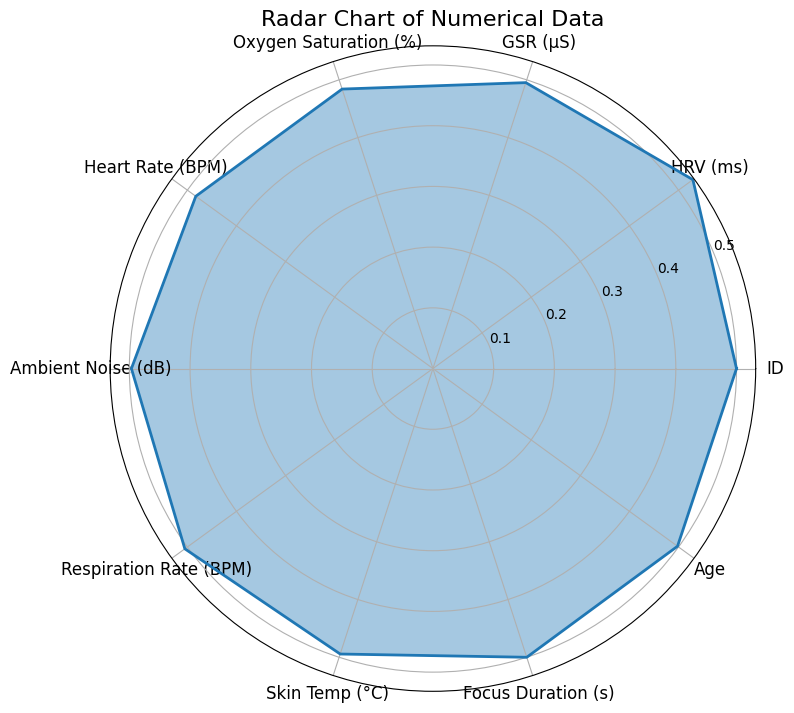

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi

# Ορισμός αριθμητικών στηλών
numerical_columns = df.select_dtypes(include=['number']).columns

# Υπολογισμός του μέσου όρου για κάθε αριθμητική στήλη
radar_data = df[numerical_columns].mean()

# Κατηγορίες (ονόματα στηλών) και τιμές
categories = radar_data.index
values = radar_data.values.tolist()

# Κλείσιμο του κύκλου για να δημιουργηθεί το πλήρες διάγραμμα
values += values[:1]
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

# Δημιουργία του διαγράμματος Radar
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Ρύθμιση των ετικετών (categories) στον άξονα
plt.xticks(angles[:-1], categories, fontsize=12)

# Σχεδίαση του radar chart
ax.plot(angles, values, linewidth=2, linestyle='solid', label='Mean Values')
ax.fill(angles, values, alpha=0.4)

# Προσθήκη τίτλου και εμφάνιση του διαγράμματος
plt.title('Radar Chart of Numerical Data', size=16)
plt.tight_layout()  # Για να προσαρμοστεί το διάγραμμα σωστά στην οθόνη
plt.show()


In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bubble Chart: Example using Age, Focus Duration, and Cognitive Load
if 'Cognitive Load' in numerical_columns:
    sns.scatterplot(x=df['Age'], y=df['Focus Duration (s)'], 
                    size=df['Cognitive Load'], sizes=(20, 200), alpha=0.6, palette="viridis")
    plt.title('Age vs Focus Duration (Bubble Size: Cognitive Load)')
    plt.xlabel('Age')
    plt.ylabel('Focus Duration (s)')
    plt.legend(title='Cognitive Load')
    plt.show()

# Group by categorical columns and calculate mean for numerical columns
for cat_col in categorical_columns:
    grouped_stats = df.groupby(cat_col)[numerical_columns].mean()
    print(f"Grouped statistics for {cat_col}:\n", grouped_stats)
    print("\n" + "="*50 + "\n")



Grouped statistics for EEG Power Bands:
                                                           ID  HRV (ms)  \
EEG Power Bands                                                          
[0.20052075417120707, 1.8946822888291044, 0.879...  0.374374  0.481867   
[0.20082204326168965, 0.9852758290281003, 1.830...  0.760761  0.363010   
[0.2018537895994518, 1.135432598454216, 0.48739...  0.147147  0.385260   
[0.20293079167952321, 0.5891171247218268, 1.134...  0.319319  0.438572   
[0.2054479666278483, 1.6435065347524813, 1.5530...  0.337337  0.546162   
...                                                      ...       ...   
[2.4825335726872093, 1.1651252097567477, 1.0275...  0.205205  0.477315   
[2.4839875422577453, 2.186578518136324, 1.86561...  0.857858  0.290660   
[2.4889236485515034, 0.66218714256368, 1.519586...  0.944945  0.595440   
[2.4928732999529544, 2.342830663937035, 1.71966...  0.809810  0.422155   
[2.4999330944469107, 1.5340481389344187, 1.5754...  0.007007  0.325204 

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


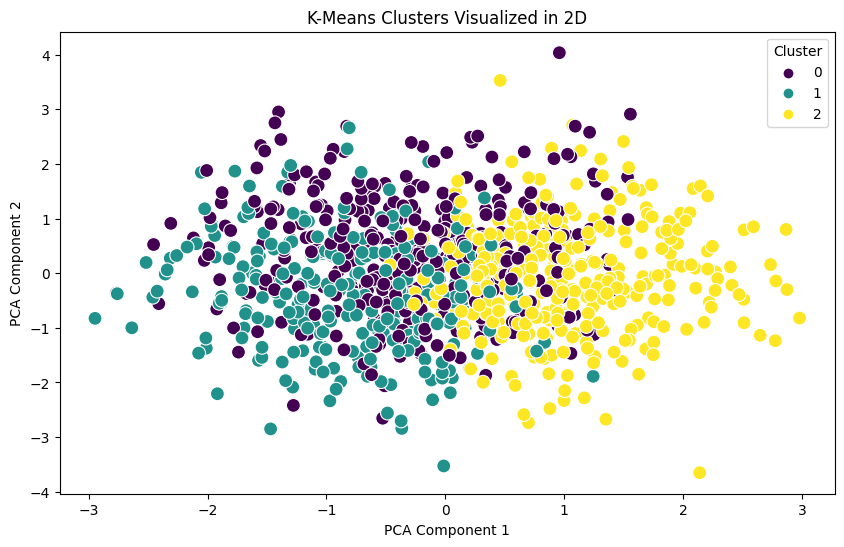

In [56]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Σκάλισμα των αριθμητικών χαρακτηριστικών
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_columns])

# Εφαρμογή του K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Μείωση διαστάσεων με PCA (2 διαστάσεις)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Δημιουργία Scatter Plot για την οπτικοποίηση των clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df['Cluster'], palette='viridis', s=100)
plt.title('K-Means Clusters Visualized in 2D')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


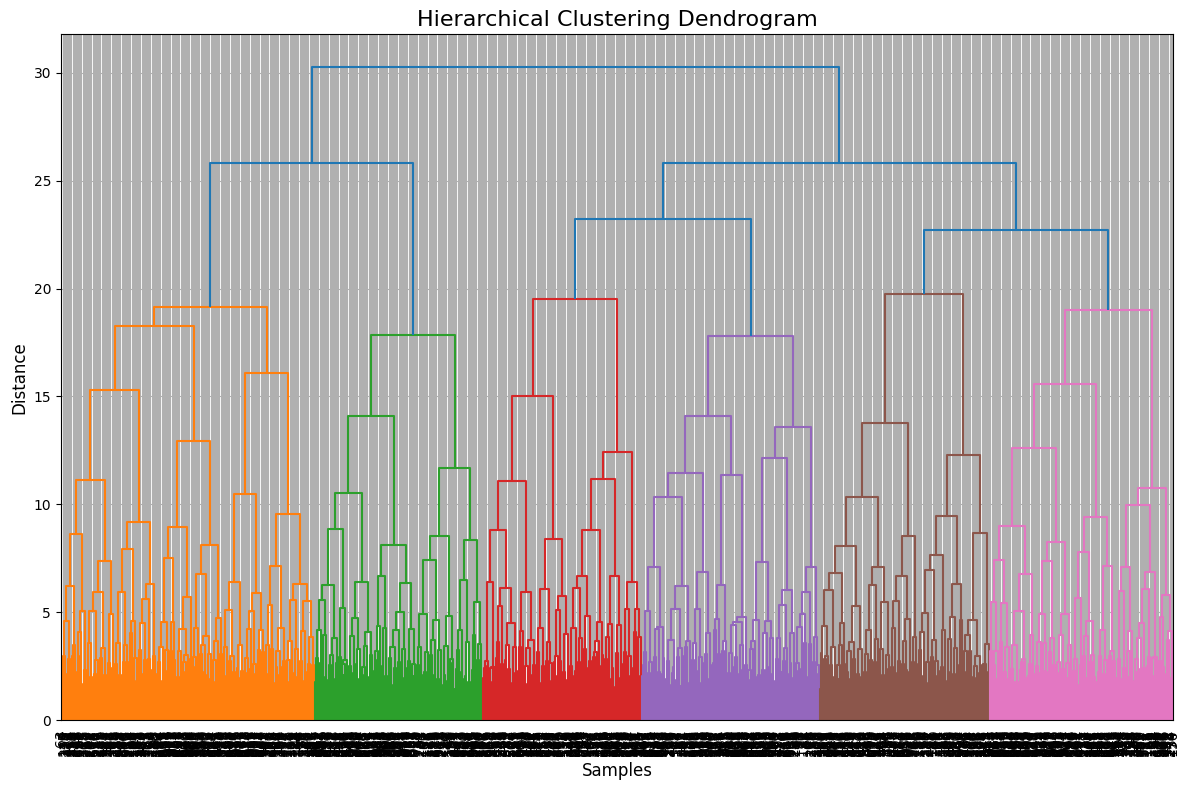

In [58]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Εκτέλεση Ιεραρχικής Ομαδοποίησης
linked = linkage(scaled_data, method='ward')

# Σχεδίαση του Dendrogram
plt.figure(figsize=(12, 8))
dendrogram(
    linked,
    orientation='top',  # Οριζόντιο dendrogram
    distance_sort='descending',  # Ταξινόμηση από τη μεγαλύτερη απόσταση
    show_leaf_counts=True,  # Εμφάνιση πλήθους φύλλων ανά κλαδί
)

# Βελτιώσεις στην οπτικοποίηση
plt.title('Hierarchical Clustering Dendrogram', fontsize=16)
plt.xlabel('Samples', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.xticks(fontsize=10, rotation=90)  # Περιστροφή των ετικετών στις Χ-άξονες για καλύτερη αναγνωσιμότητα
plt.yticks(fontsize=10)
plt.grid(True)

plt.tight_layout()  # Για καλύτερη διάταξη των στοιχείων
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


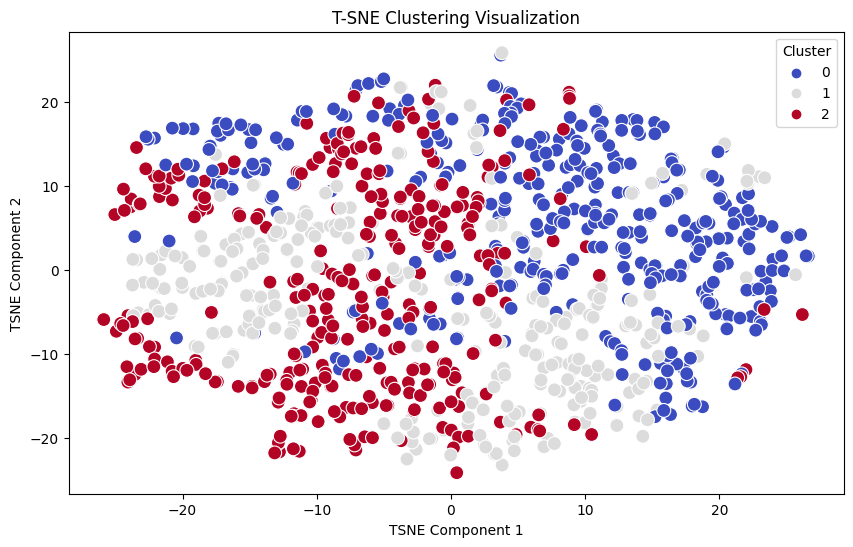

In [63]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Κλίμακα των αριθμητικών δεδομένων
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_columns])

# Εφαρμογή KMeans για τη δημιουργία Clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Εφαρμογή t-SNE για οπτικοποίηση σε 2 διαστάσεις
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(scaled_data)

# Οπτικοποίηση των αποτελεσμάτων του t-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=df['Cluster'], palette='coolwarm', s=100)
plt.title('T-SNE Clustering Visualization')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.show()

